In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")
# import data modelling libraries
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [3]:
# load the dataset
data= pd.read_csv("file:///C:/Users/SR%20COMPUTER/Downloads/new_train.csv")

# check shape of dataset
print("shape of the data:", data.shape)
data.head()

shape of the data: (32950, 16)


age           job   marital          education  default housing loan  \
0   49   blue-collar   married           basic.9y  unknown      no   no   
1   37  entrepreneur   married  university.degree       no      no   no   
2   78       retired   married           basic.4y       no      no   no   
3   36        admin.   married  university.degree       no     yes   no   
4   59       retired  divorced  university.degree       no      no   no   

     contact month day_of_week  duration  campaign  pdays  previous  \
0   cellular   nov         wed       227         4    999         0   
1  telephone   nov         wed       202         2    999         1   
2   cellular   jul         mon      1148         1    999         0   
3  telephone   may         mon       120         2    999         0   
4   cellular   jun         tue       368         2    999         0   

      poutcome    y  
0  nonexistent   no  
1      failure   no  
2  nonexistent  yes  
3  nonexistent   no  
4  nonexistent   no

In [4]:
data.dtypes

age             int64
job            object
marital        object
education      object
default        object
housing        object
loan           object
contact        object
month          object
day_of_week    object
duration        int64
campaign        int64
pdays           int64
previous        int64
poutcome       object
y              object
dtype: object

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32950 entries, 0 to 32949
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          32950 non-null  int64 
 1   job          32950 non-null  object
 2   marital      32950 non-null  object
 3   education    32950 non-null  object
 4   default      32950 non-null  object
 5   housing      32950 non-null  object
 6   loan         32950 non-null  object
 7   contact      32950 non-null  object
 8   month        32950 non-null  object
 9   day_of_week  32950 non-null  object
 10  duration     32950 non-null  int64 
 11  campaign     32950 non-null  int64 
 12  pdays        32950 non-null  int64 
 13  previous     32950 non-null  int64 
 14  poutcome     32950 non-null  object
 15  y            32950 non-null  object
dtypes: int64(5), object(11)
memory usage: 4.0+ MB


In [6]:
data.describe()

age      duration      campaign         pdays      previous
count  32950.000000  32950.000000  32950.000000  32950.000000  32950.000000
mean      40.014112    258.127466      2.560607    962.052413      0.174719
std       10.403636    258.975917      2.752326    187.951096      0.499025
min       17.000000      0.000000      1.000000      0.000000      0.000000
25%       32.000000    103.000000      1.000000    999.000000      0.000000
50%       38.000000    180.000000      2.000000    999.000000      0.000000
75%       47.000000    319.000000      3.000000    999.000000      0.000000
max       98.000000   4918.000000     56.000000    999.000000      7.000000

In [7]:
data.corr().describe().T

count      mean       std       min       25%       50%       75%  \
age         5.0  0.198024  0.448720 -0.032011 -0.001841  0.003302  0.020670   
duration    5.0  0.179581  0.460220 -0.075663 -0.047127 -0.001841  0.022538   
campaign    5.0  0.180477  0.461525 -0.079051 -0.075663  0.003302  0.053795   
pdays       5.0  0.077011  0.575351 -0.589601 -0.047127 -0.032011  0.053795   
previous    5.0  0.074911  0.575924 -0.589601 -0.079051  0.020670  0.022538   

          max  
age       1.0  
duration  1.0  
campaign  1.0  
pdays     1.0  
previous  1.0

In [8]:
data.isnull().sum()

age            0
job            0
marital        0
education      0
default        0
housing        0
loan           0
contact        0
month          0
day_of_week    0
duration       0
campaign       0
pdays          0
previous       0
poutcome       0
y              0
dtype: int64

<AxesSubplot:>

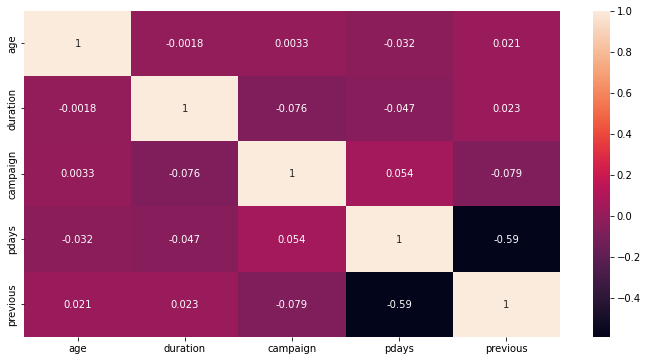

In [11]:
plt.figure(figsize=(12,6))
sns.heatmap(data.corr(),annot=True)

In [12]:
# target class count
data["y"].value_counts()

no     29238
yes     3712
Name: y, dtype: int64

Text(0.5, 1.0, 'target variable')

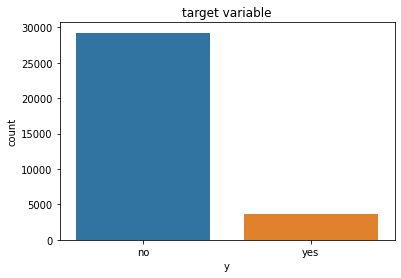

In [13]:
sns.countplot(data["y"])
plt.title("target variable")

In [18]:
# percentage of class present in target variable(y) 
print("percentage of NO and YES\n",data["y"].value_counts()/len(data)*100)

percentage of NO and YES
 no     88.734446
yes    11.265554
Name: y, dtype: float64


Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'y'],
      dtype='object')


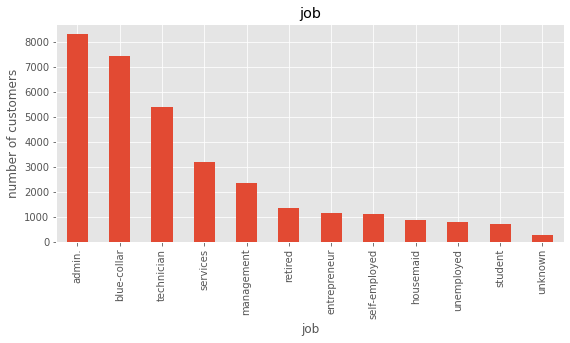

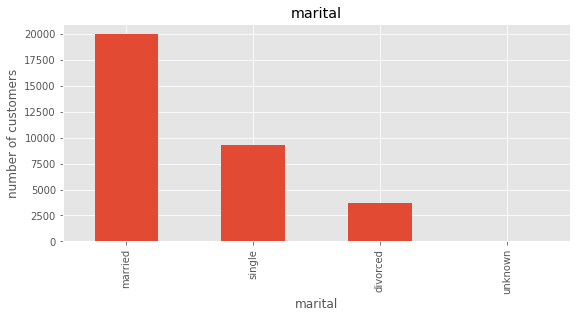

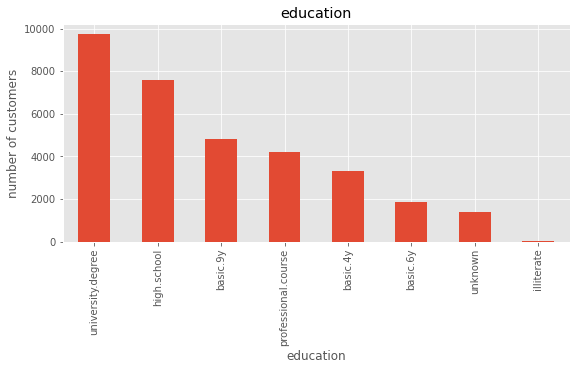

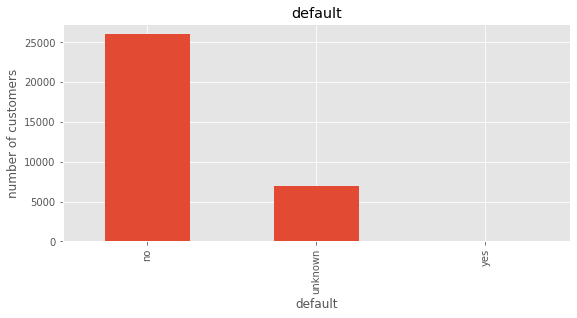

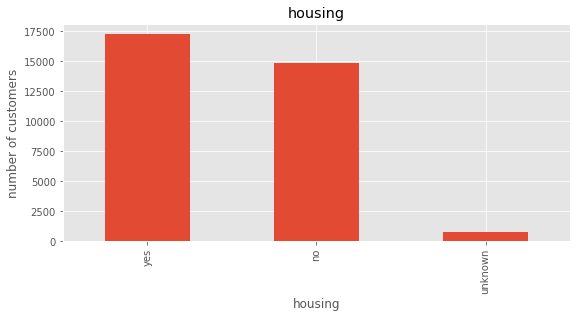

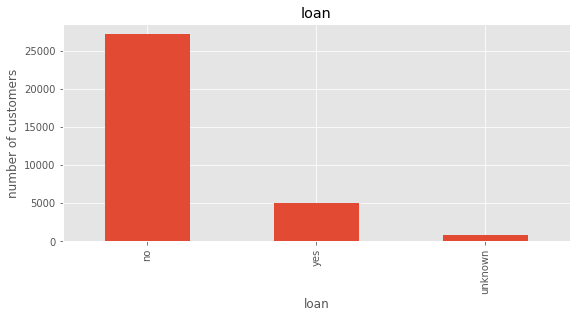

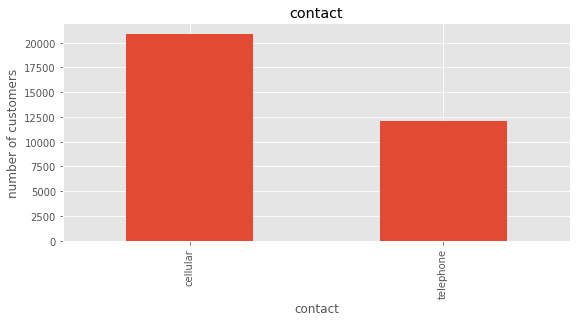

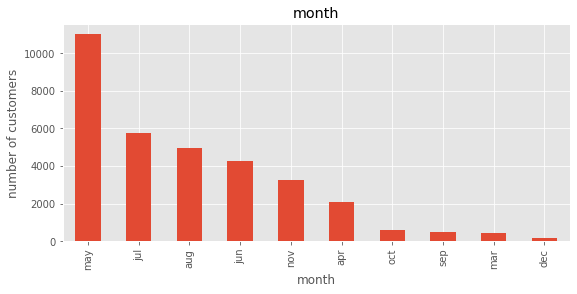

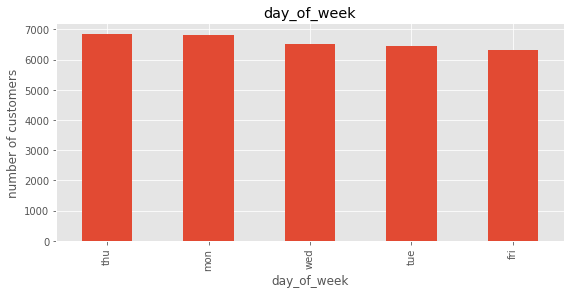

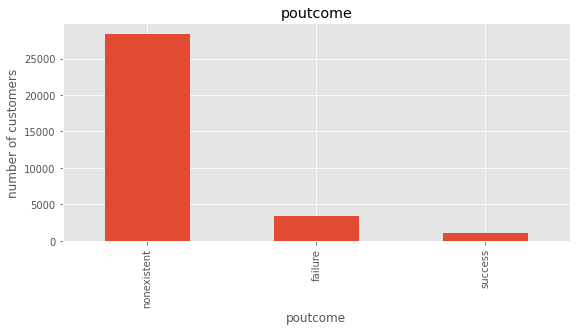

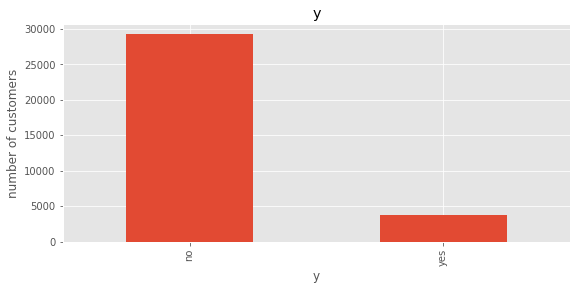

In [19]:
# indentifying the categorical variables
cat_var= data.select_dtypes(include= ["object"]).columns
print(cat_var)

# plotting bar chart for each categorical variable
plt.style.use("ggplot")

for column in cat_var:
    plt.figure(figsize=(20,4))
    plt.subplot(121)
    data[column].value_counts().plot(kind="bar")
    plt.xlabel(column)
    plt.ylabel("number of customers")
    plt.title(column)

In [24]:
# replacing "unknown" with the mode
for column in cat_var:
    mode= data[column].mode()[0]
    data[column]= data[column].replace("unknown", mode)

In [25]:
data.duplicated().any()

True

In [26]:
# indentifying the numerical variables
num_var= data.select_dtypes(include=np.number)
num_var.head()

age  duration  campaign  pdays  previous
0   49       227         4    999         0
1   37       202         2    999         1
2   78      1148         1    999         0
3   36       120         2    999         0
4   59       368         2    999         0

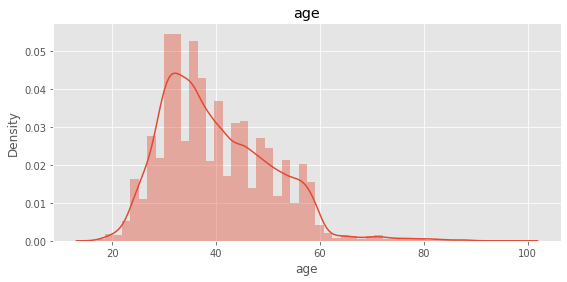

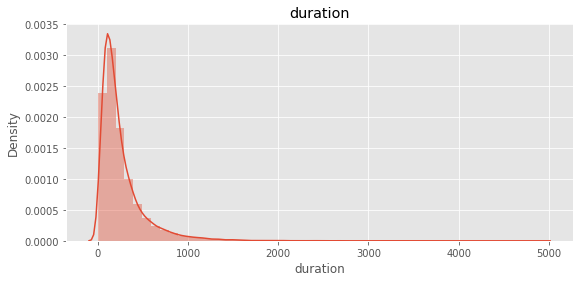

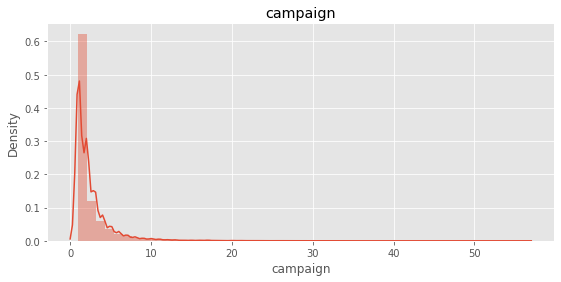

In [27]:
# plotting histogram for each numerical variable
plt.style.use("ggplot")
for column in ["age", "duration", "campaign"]:
    plt.figure(figsize=(20,4))
    plt.subplot(121)
    sns.distplot(data[column], kde=True)
    plt.title(column)

In [28]:
data.drop(columns=["pdays", "previous"], axis=1, inplace=True)

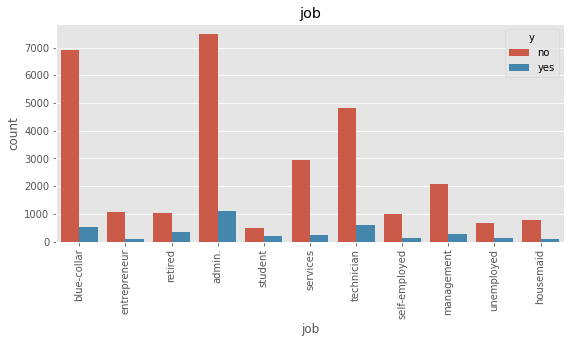

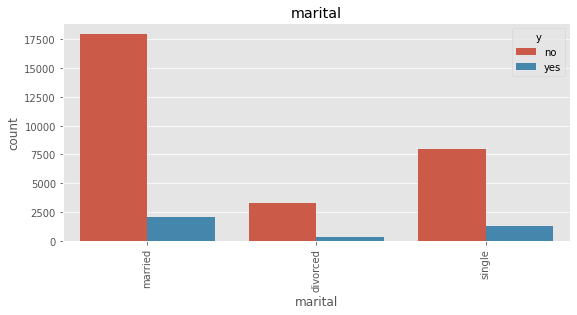

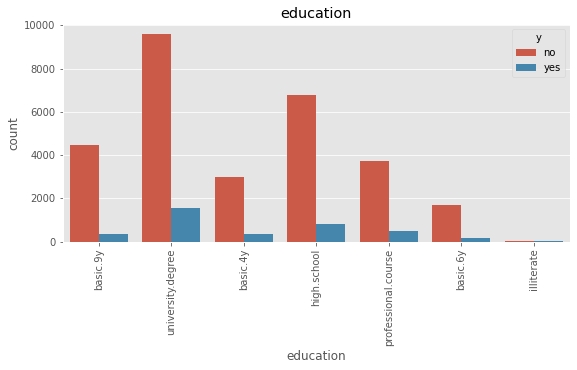

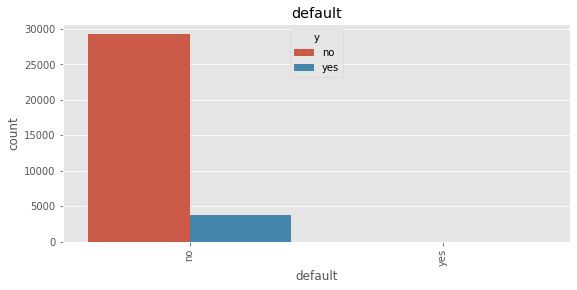

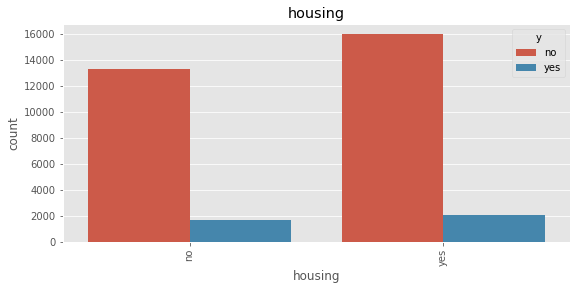

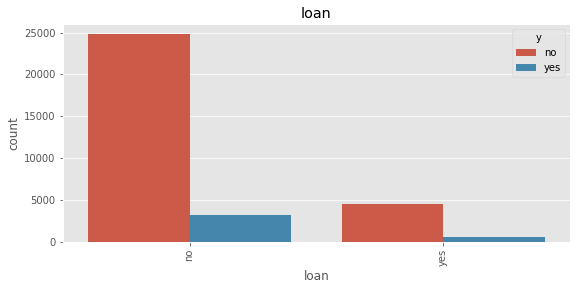

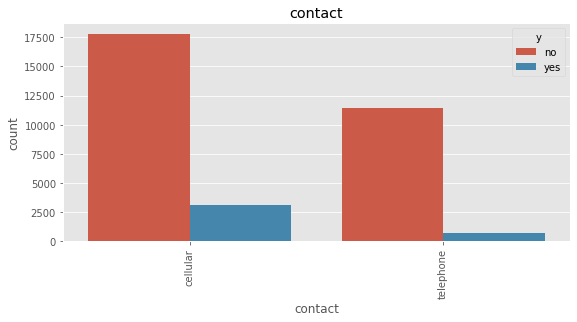

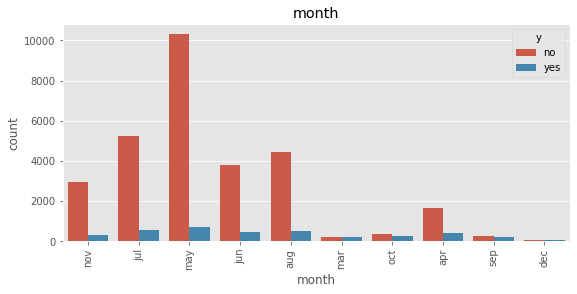

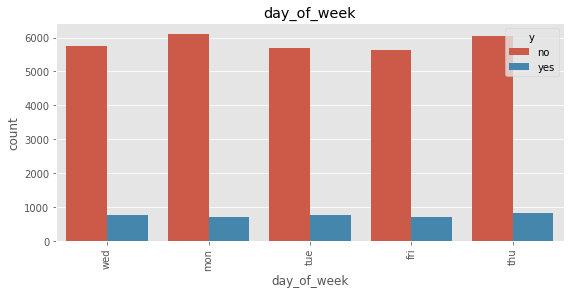

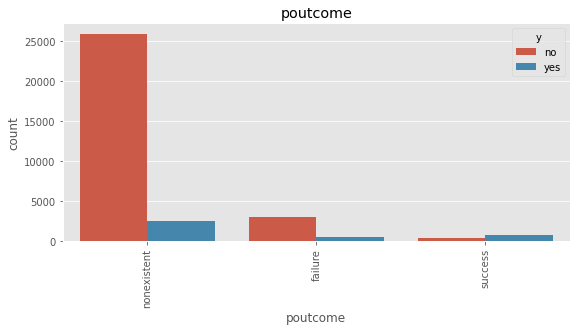

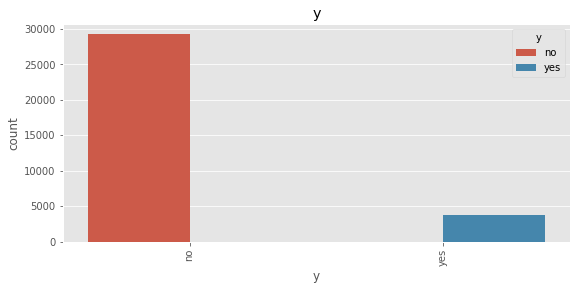

In [29]:
plt.style.use("ggplot")
for column in cat_var:
    plt.figure(figsize=(20,4))
    plt.subplot(121)
    sns.countplot(data[column], hue=data["y"])
    plt.title(column)    
    plt.xticks(rotation=90)

In [30]:
# compute interquantile range to calculate the boundaries
lower_boundries= []
upper_boundries= []
for i in ["age", "duration", "campaign"]:
    IQR= data[i].quantile(0.75) - data[i].quantile(0.25)
    lower_bound= data[i].quantile(0.25) - (1.5*IQR)
    upper_bound= data[i].quantile(0.75) + (1.5*IQR)
    
    print(i, ":", lower_bound, ",",  upper_bound)
    
    lower_boundries.append(lower_bound)
    upper_boundries.append(upper_bound)

age : 9.5 , 69.5
duration : -221.0 , 643.0
campaign : -2.0 , 6.0


In [31]:
lower_boundries

[9.5, -221.0, -2.0]

In [32]:
upper_boundries

[69.5, 643.0, 6.0]

In [33]:
# replace the all the outliers which is greater then upper boundary by upper boundary
j = 0
for i in ["age", "duration", "campaign"]:
    data.loc[data[i] > upper_boundries[j], i] = int(upper_boundries[j])
    j = j + 1  

In [34]:
data.describe()

age      duration      campaign
count  32950.000000  32950.000000  32950.000000
mean      39.929894    234.923915      2.271077
std       10.118566    176.854558      1.546302
min       17.000000      0.000000      1.000000
25%       32.000000    103.000000      1.000000
50%       38.000000    180.000000      2.000000
75%       47.000000    319.000000      3.000000
max       69.000000    643.000000      6.000000

<AxesSubplot:>

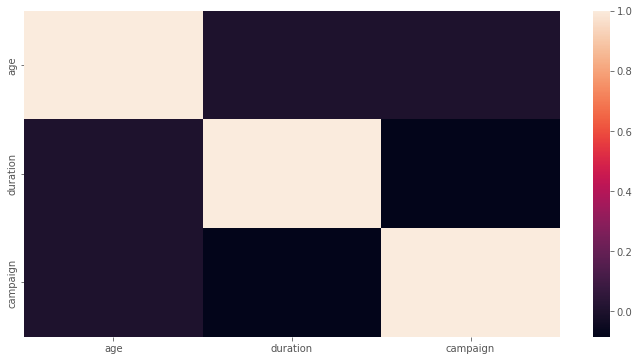

In [42]:
plt.figure(figsize=(12,6))
sns.heatmap(data.corr())

In [45]:
list(cat_var)

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome',
 'y']

In [46]:
for i in cat_var:
    print(i, ":", data[i].unique())

job : ['blue-collar' 'entrepreneur' 'retired' 'admin.' 'student' 'services'
 'technician' 'self-employed' 'management' 'unemployed' 'housemaid']
marital : ['married' 'divorced' 'single']
education : ['basic.9y' 'university.degree' 'basic.4y' 'high.school'
 'professional.course' 'basic.6y' 'illiterate']
default : ['no' 'yes']
housing : ['no' 'yes']
loan : ['no' 'yes']
contact : ['cellular' 'telephone']
month : ['nov' 'jul' 'may' 'jun' 'aug' 'mar' 'oct' 'apr' 'sep' 'dec']
day_of_week : ['wed' 'mon' 'tue' 'fri' 'thu']
poutcome : ['nonexistent' 'failure' 'success']
y : ['no' 'yes']


In [47]:
# initializing label encoder
le= LabelEncoder()

# iterating through each categorical feature and label encoding them
for feature in cat_var:
    data[feature]= le.fit_transform(data[feature])

In [49]:
# label encoded dataset
data.head()

age  job  marital  education  default  housing  loan  contact  month  \
0   49    1        1          2        0        0     0        0      7   
1   37    2        1          6        0        0     0        1      7   
2   69    5        1          0        0        0     0        0      3   
3   36    0        1          6        0        1     0        1      6   
4   59    5        0          6        0        0     0        0      4   

   day_of_week  duration  campaign  poutcome  y  
0            4       227         4         1  0  
1            4       202         2         0  0  
2            1       643         1         1  1  
3            1       120         2         1  0  
4            3       368         2         1  0

In [50]:
# feature variables
x= data.iloc[:, :-1]

# target variable
y= data.iloc[:, -1]

<AxesSubplot:>

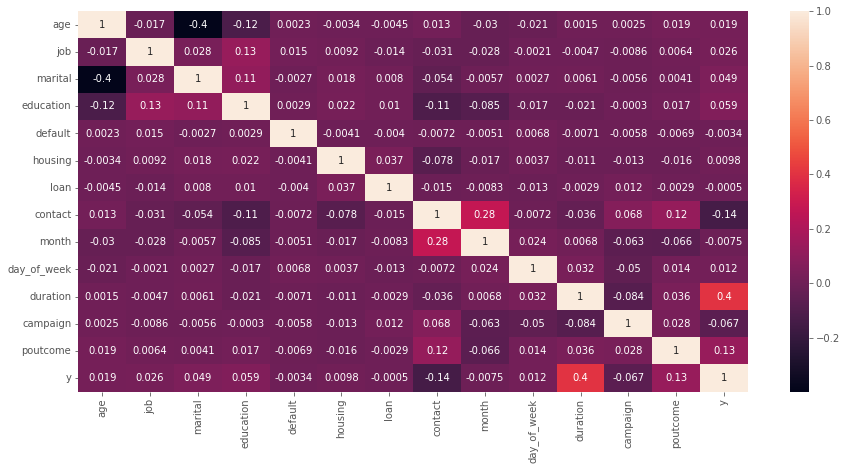

In [51]:
plt.figure(figsize=(15,7))
sns.heatmap(data.corr(), annot=True)

In [52]:
!pip install imbalanced-learn

In [53]:
from imblearn.combine import SMOTETomek

In [54]:
#initialising oversampling
smote= SMOTETomek(0.75)

#implementing oversampling to training data
x_sm, y_sm= smote.fit_sample(x,y)

# x_sm and y_sm are the resampled data

# target class count of resampled dataset
y_sm.value_counts()

0    28948
1    21638
Name: y, dtype: int64

In [55]:
x_train, x_test, y_train, y_test= train_test_split(x_sm, y_sm, test_size=0.2, random_state=42)

In [56]:
# selecting the classifier
log_reg= LogisticRegression()

# selecting hyperparameter tuning
log_param= {"C": 10.0**np.arange(-2,3), "penalty": ["l1", "l2"]}

# defining stratified Kfold cross validation
cv_log= StratifiedKFold(n_splits=5)

# using gridsearch for respective parameters
gridsearch_log= GridSearchCV(log_reg, log_param, cv=cv_log, scoring= "f1_macro", n_jobs=-1, verbose=2)

# fitting the model on resampled data
gridsearch_log.fit(x_train, y_train)

# printing best score and best parameters
print("best score is:" ,gridsearch_log.best_score_)
print("best parameters are:" ,gridsearch_log.best_params_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
best score is: 0.794123213816109
best parameters are: {'C': 0.1, 'penalty': 'l2'}


[[4886  927]
 [1087 3218]]
0.8009488041114845
              precision    recall  f1-score   support

           0       0.82      0.84      0.83      5813
           1       0.78      0.75      0.76      4305

    accuracy                           0.80     10118
   macro avg       0.80      0.79      0.80     10118
weighted avg       0.80      0.80      0.80     10118



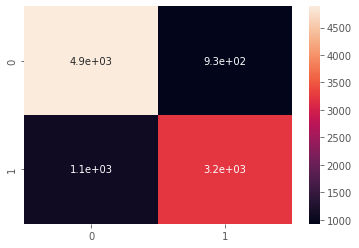

In [57]:
# checking model performance
y_predicted= gridsearch_log.predict(x_test)

cm= confusion_matrix(y_test, y_predicted)
print(cm)
sns.heatmap(cm, annot=True)
print(accuracy_score(y_test, y_predicted))
print(classification_report(y_test, y_predicted))

In [58]:
# random forest
rf= RandomForestClassifier()

rf_param= { 
           "n_estimators": [int(x) for x in np.linspace(start=100, stop=1000, num=10)],
           "max_features": ["auto", "sqrt", "log2"],
#            "max_depth": [4,5,6,7,8],
           "max_depth": [int(x) for x in np.linspace(start=5, stop=30, num=6)],
           "min_samples_split": [5,10,15,100],
           "min_samples_leaf": [1,2,5,10],
           "criterion":['gini', 'entropy'] 
          }

cv_rf= StratifiedKFold(n_splits=5)

randomsearch_rf= RandomizedSearchCV(rf, rf_param, cv=cv_rf, scoring= "f1_macro", n_jobs=-1, verbose=2, n_iter=10)

randomsearch_rf.fit(x_train, y_train)

print("best score is:", randomsearch_rf.best_score_)
print("best parameters are:", randomsearch_rf.best_params_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
best score is: 0.9080031056577482
best parameters are: {'n_estimators': 1000, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 25, 'criterion': 'gini'}


[[5272  541]
 [ 317 3988]]
0.9152006325360743
              precision    recall  f1-score   support

           0       0.94      0.91      0.92      5813
           1       0.88      0.93      0.90      4305

    accuracy                           0.92     10118
   macro avg       0.91      0.92      0.91     10118
weighted avg       0.92      0.92      0.92     10118



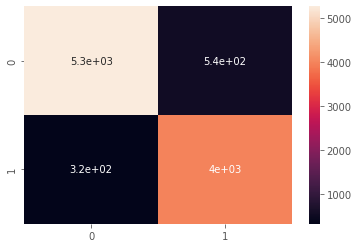

In [59]:
# checking model performance
y_predicted_rf= randomsearch_rf.predict(x_test)

print(confusion_matrix(y_test, y_predicted_rf))
sns.heatmap(confusion_matrix(y_test, y_predicted_rf), annot=True)
print(accuracy_score(y_test, y_predicted_rf))
print(classification_report(y_test, y_predicted_rf))

In [60]:
test_data= pd.read_csv("file:///C:/Users/SR%20COMPUTER/Downloads/new_test.csv")
test_data.head()

age  job  marital  education  default  housing  loan  contact  month  \
0   32    4        0          6        0        0     0        0      3   
1   37   10        3          6        0        0     0        0      4   
2   55    5        0          5        1        2     0        0      3   
3   44    2        1          0        1        0     0        1      4   
4   28    0        2          3        0        0     0        0      5   

   day_of_week  duration  campaign  poutcome  
0            3       131         5         1  
1            3       100         1         1  
2            2       131         2         1  
3            3        48         2         1  
4            0       144         2         1

In [61]:
# predicting the test data
y_predicted= randomsearch_rf.predict(test_data)
y_predicted

array([0, 0, 0, ..., 1, 0, 0])

In [62]:
# dataset of predicted values for target variable y
prediction= pd.DataFrame(y_predicted, columns=["y_predicted"])
prediction_dataset= pd.concat([test_data, prediction], axis=1)
prediction_dataset

age  job  marital  education  default  housing  loan  contact  month  \
0      32    4        0          6        0        0     0        0      3   
1      37   10        3          6        0        0     0        0      4   
2      55    5        0          5        1        2     0        0      3   
3      44    2        1          0        1        0     0        1      4   
4      28    0        2          3        0        0     0        0      5   
...   ...  ...      ...        ...      ...      ...   ...      ...    ...   
8233   48    4        1          2        0        2     0        0      6   
8234   30    7        2          3        0        2     0        0      6   
8235   33    7        1          3        0        0     0        0      4   
8236   44    1        1          1        0        2     2        1      6   
8237   42    1        1          2        1        2     0        0      6   

      day_of_week  duration  campaign  poutcome  y_predicted  
0               3       131         5         1            0  
1               3       100         1         1            0  
2               2       131         2         1            0  
3               3        48         2         1            0  
4               0       144         2         1            0  
...           ...       ...       ...       ...          ...  
8233            3       554         1         1            1  
8234            0       159         1         1            0  
8235            1       472         1         0            1  
8236            1       554         5         1            0  
8237            3        83         5         1            0  

[8238 rows x 14 columns]

In [63]:
data.head()

age  job  marital  education  default  housing  loan  contact  month  \
0   49    1        1          2        0        0     0        0      7   
1   37    2        1          6        0        0     0        1      7   
2   69    5        1          0        0        0     0        0      3   
3   36    0        1          6        0        1     0        1      6   
4   59    5        0          6        0        0     0        0      4   

   day_of_week  duration  campaign  poutcome  y  
0            4       227         4         1  0  
1            4       202         2         0  0  
2            1       643         1         1  1  
3            1       120         2         1  0  
4            3       368         2         1  0

In [64]:
for i  in data.columns:
    print(f'unique values in column "{i}" is\n {data[i].value_counts()}')
    print('-------------------------------------------------')

unique values in column "age" is
 31    1551
32    1474
33    1443
35    1417
34    1404
36    1402
30    1365
29    1171
37    1160
38    1139
39    1131
41    1031
40     945
42     915
45     871
43     827
44     826
46     823
28     799
48     775
47     747
50     707
27     675
49     670
52     625
51     601
53     583
26     583
56     562
54     556
55     527
57     521
25     488
58     455
69     393
24     381
59     374
60     223
23     181
22     102
21      80
61      61
62      53
20      52
66      45
64      43
63      41
65      38
19      37
68      28
67      24
18      22
17       3
Name: age, dtype: int64
-------------------------------------------------
unique values in column "job" is
 0     8579
1     7441
9     5400
7     3196
4     2345
5     1366
2     1160
6     1099
3      855
10     798
8      711
Name: job, dtype: int64
-------------------------------------------------
unique values in column "marital" is
 1    20018
2     9257
0     3675
Name: mar

In [65]:
object_col=[]
num_col=[]
for i in data.columns:
    if data[i].dtype=='object':
        object_col.append(i)
    else:
        num_col.append(i)

In [66]:
num_col

['age',
 'job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'duration',
 'campaign',
 'poutcome',
 'y']

In [67]:
object_col

[]

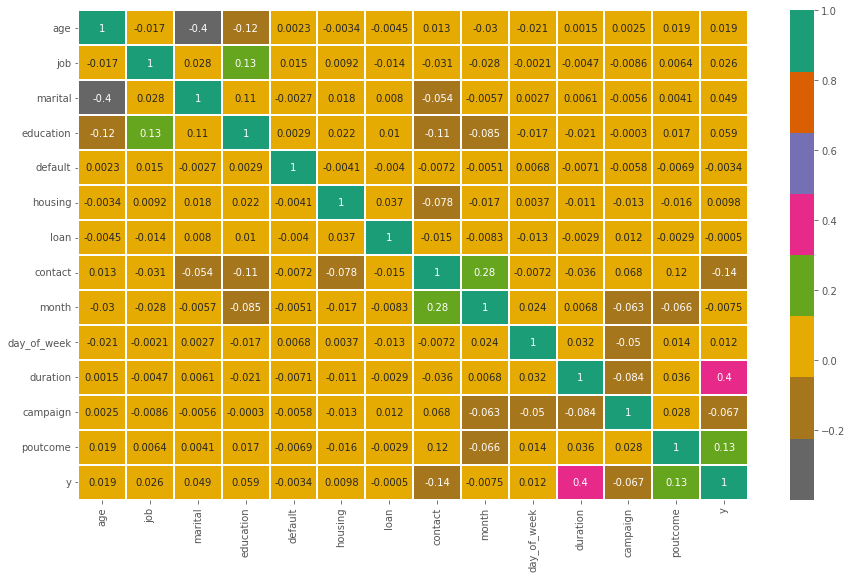

In [68]:
plt.figure(figsize=(15,9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(data.corr(),annot=True,cmap='Dark2_r',linewidths=2)
plt.show()

In [69]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'poutcome',
       'y'],
      dtype='object')

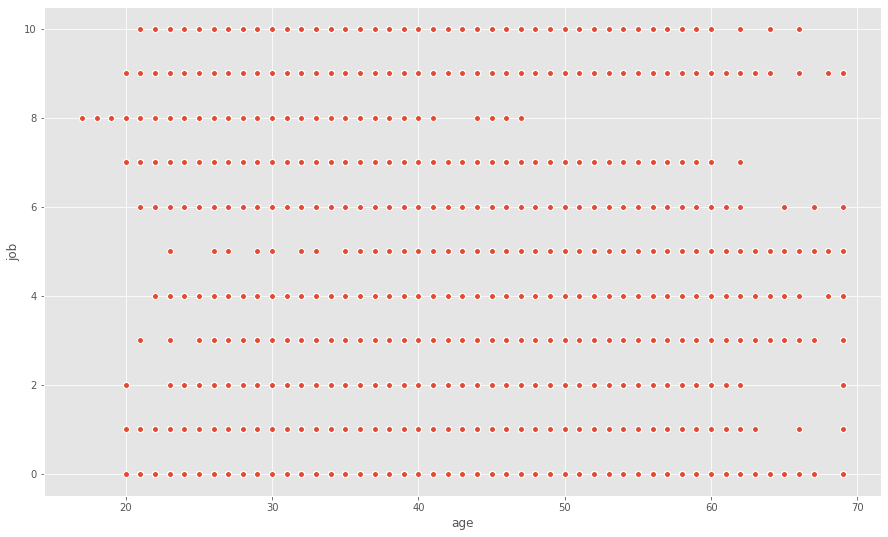

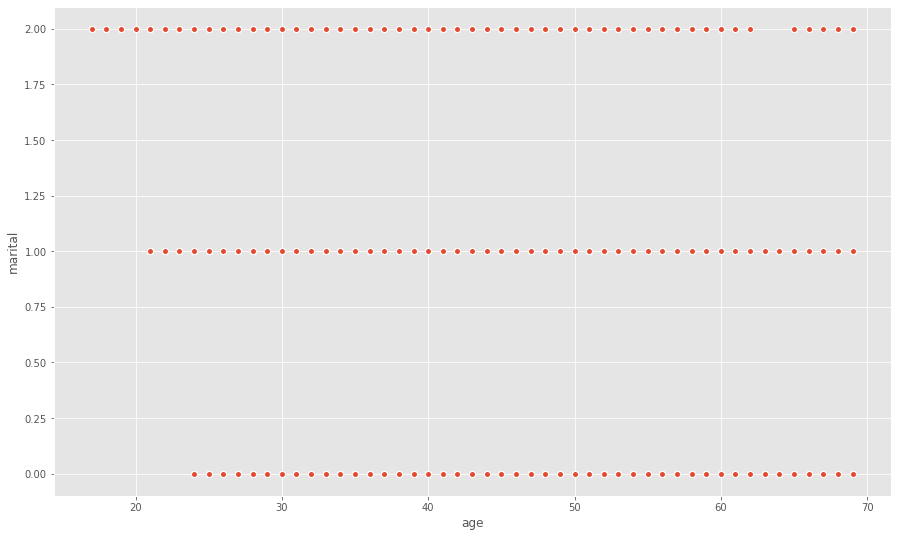

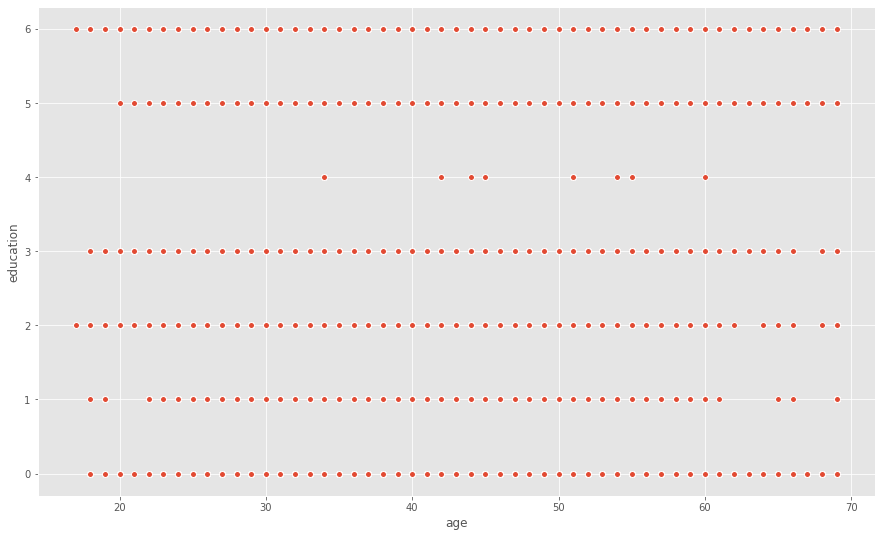

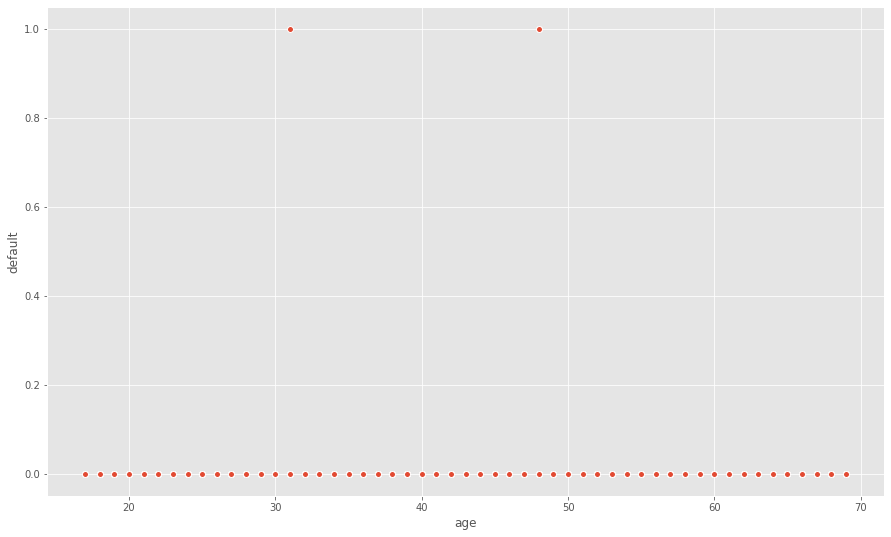

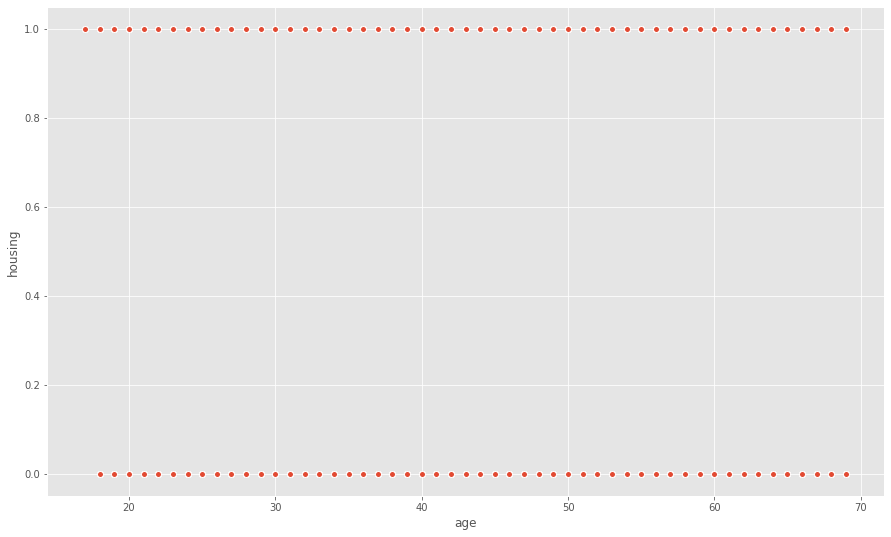

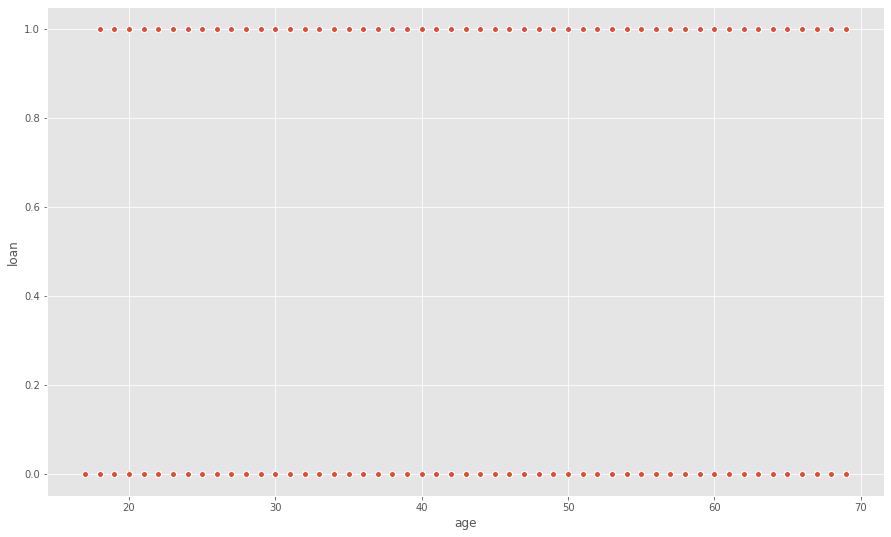

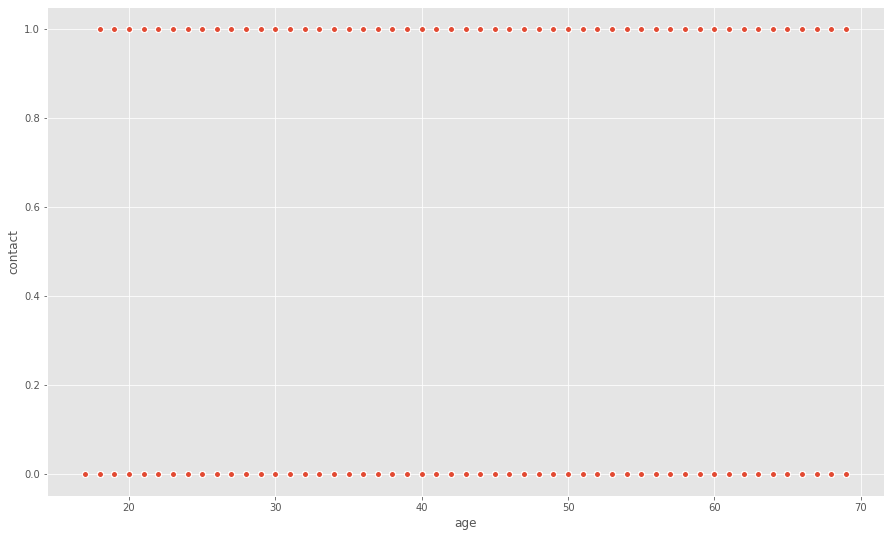

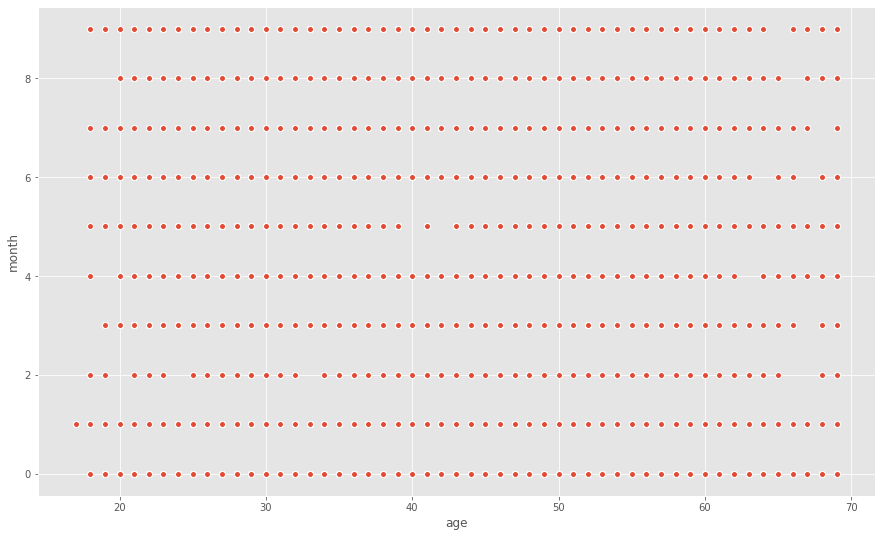

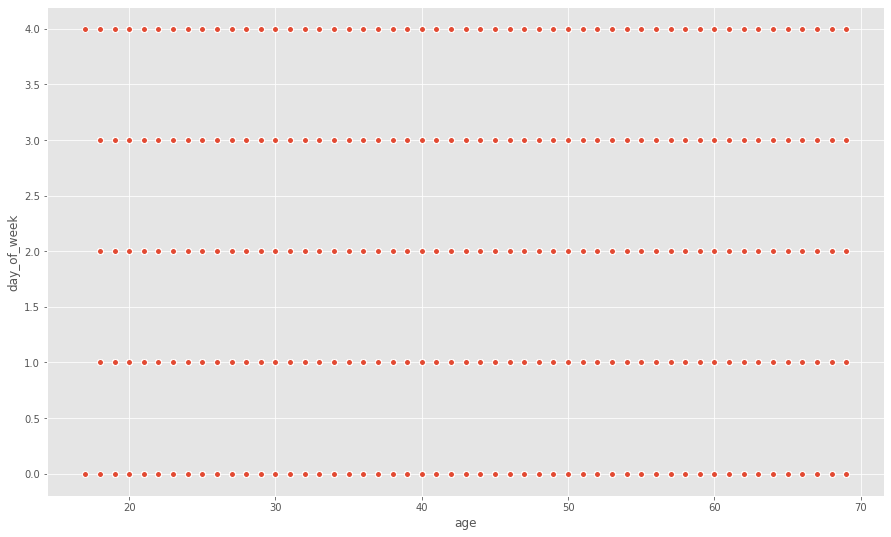

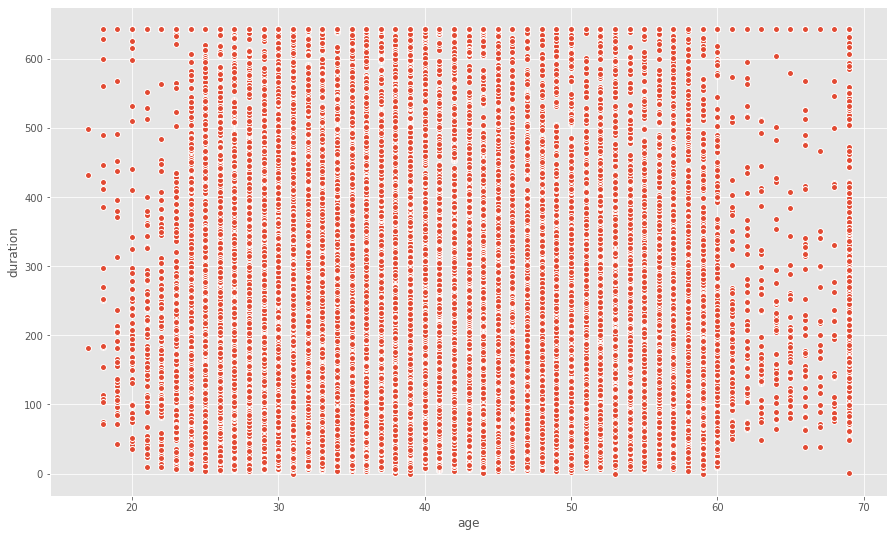

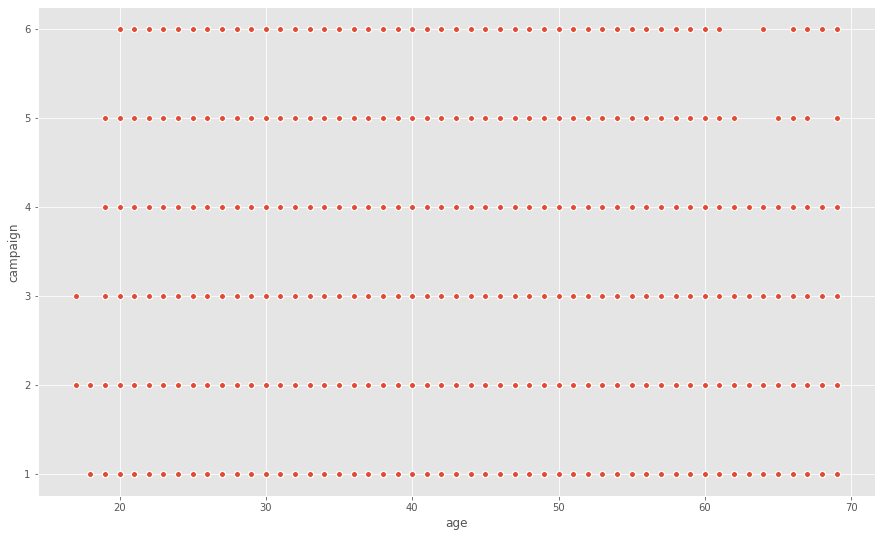

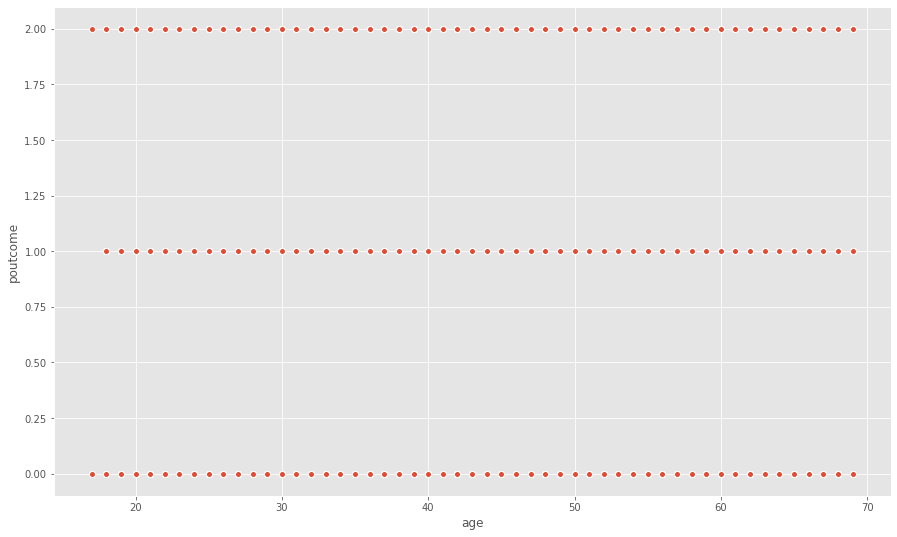

In [72]:
for i in ['job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'poutcome'
       ]:
    plt.figure(figsize=(15,9))
    sns.scatterplot(x=data.age,y=data[i],data=data,linewidth=1)
    plt.show()


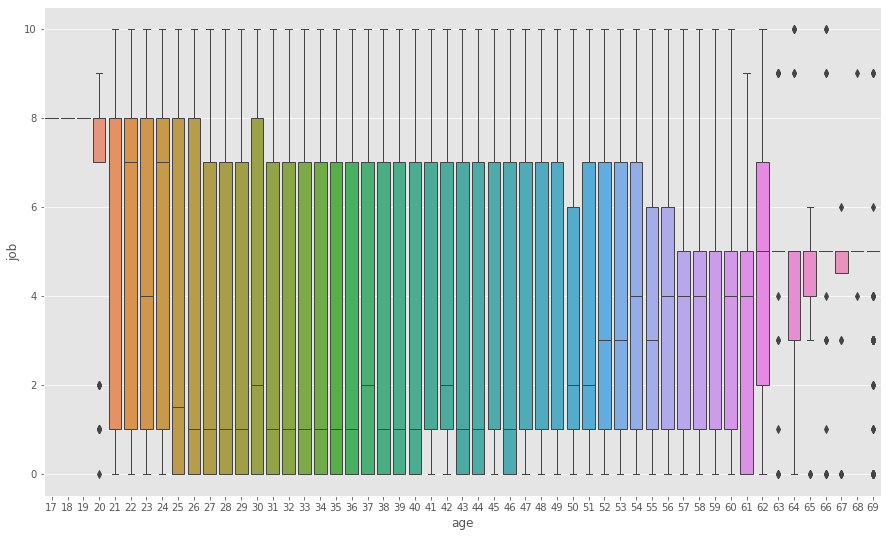

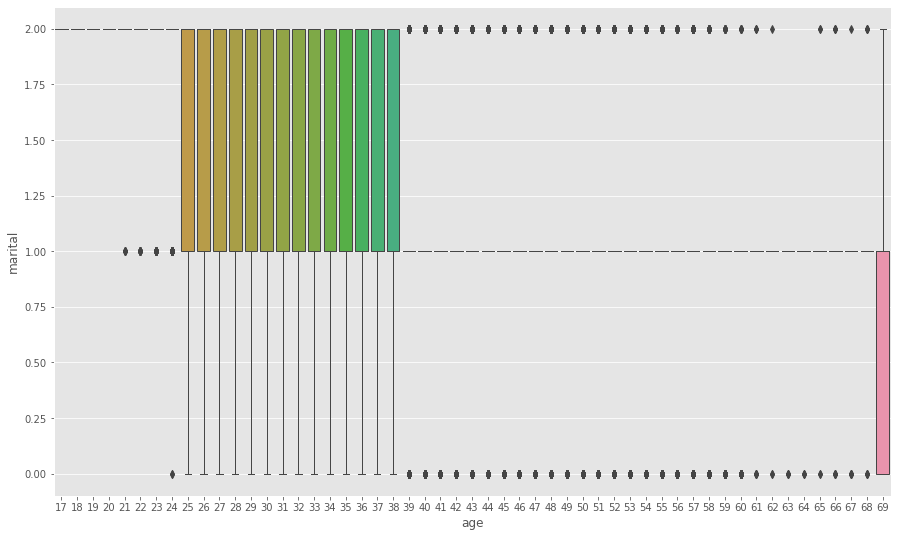

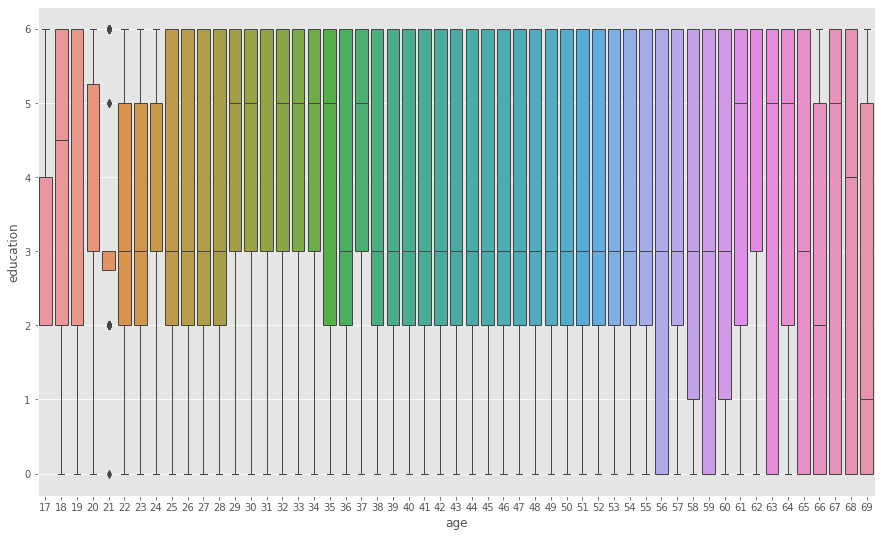

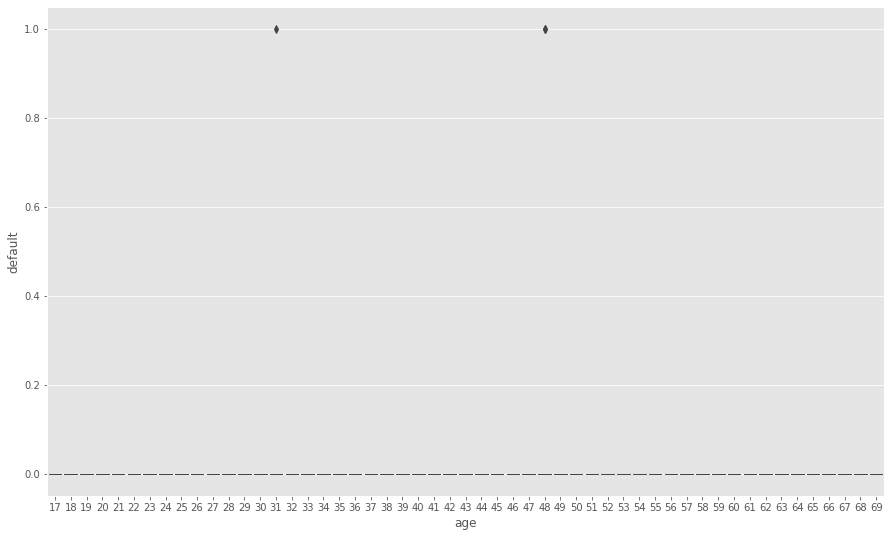

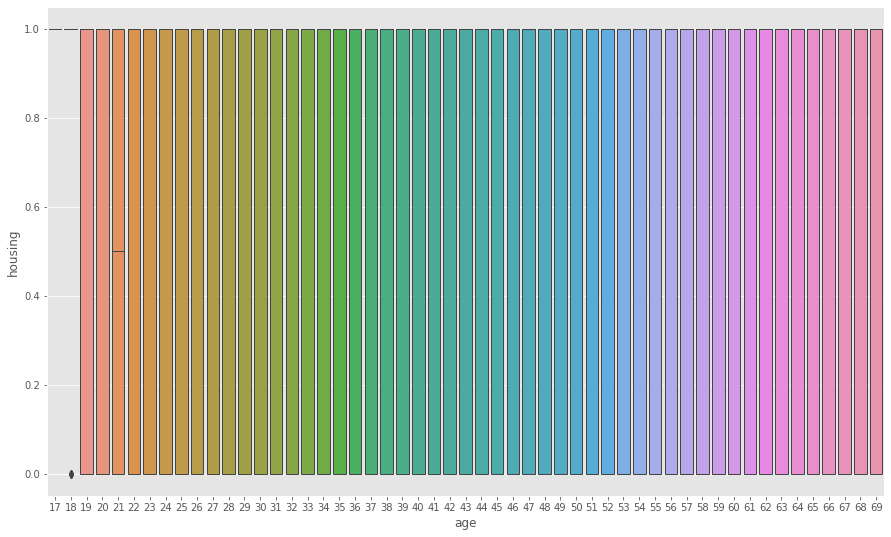

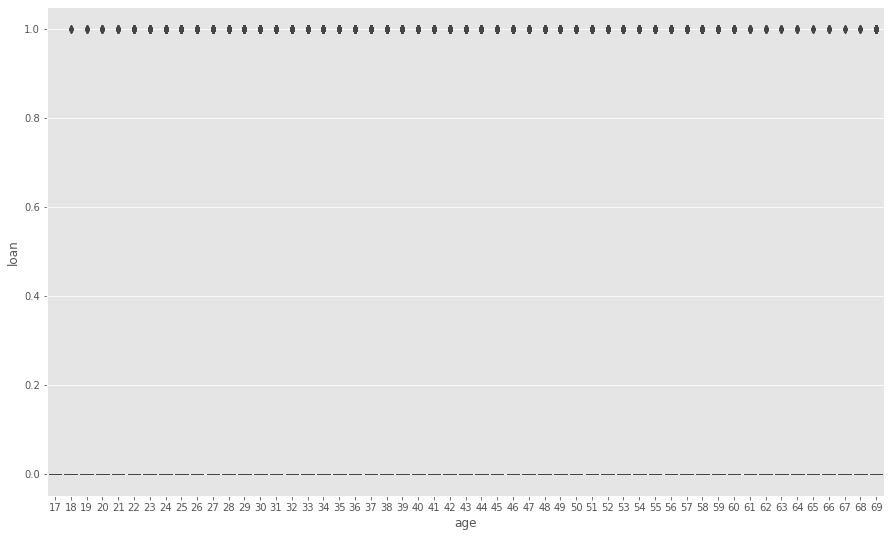

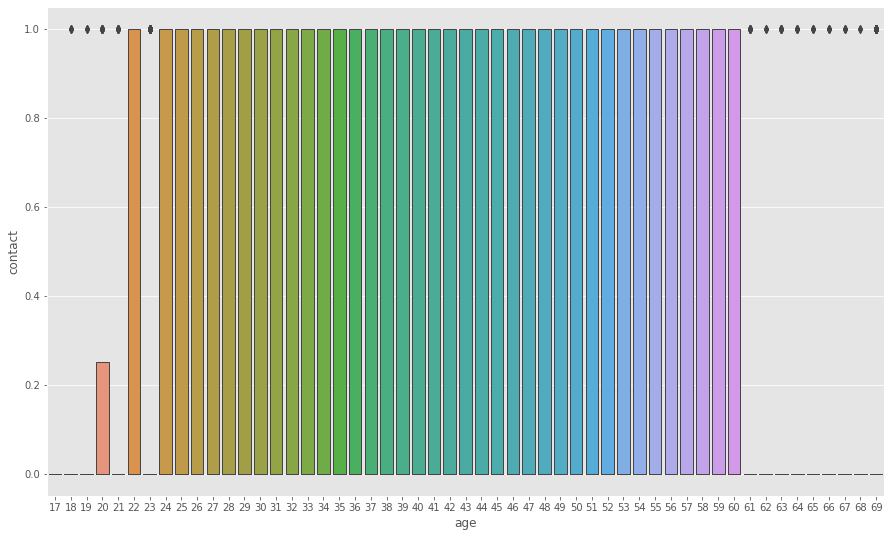

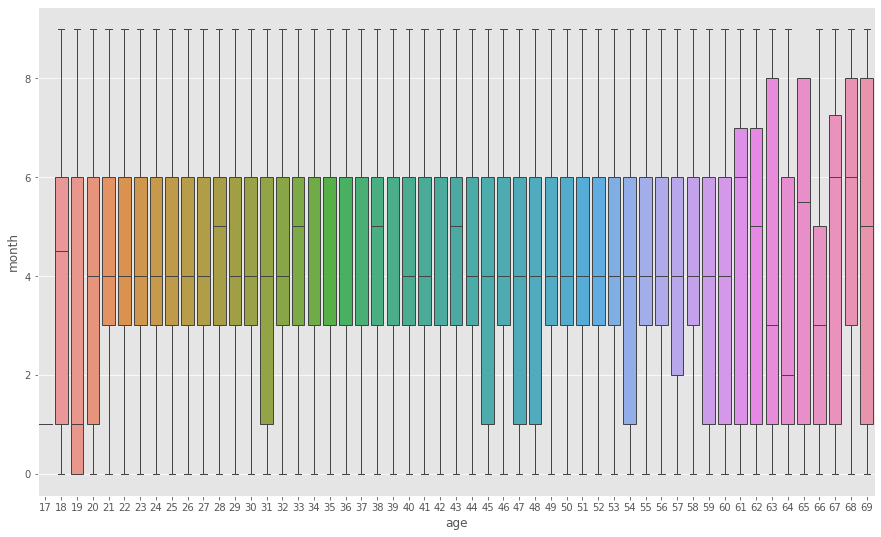

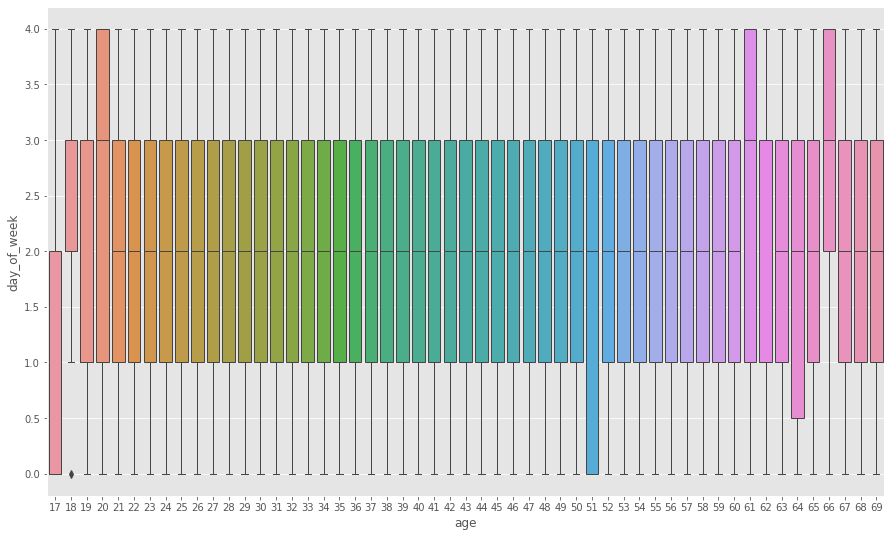

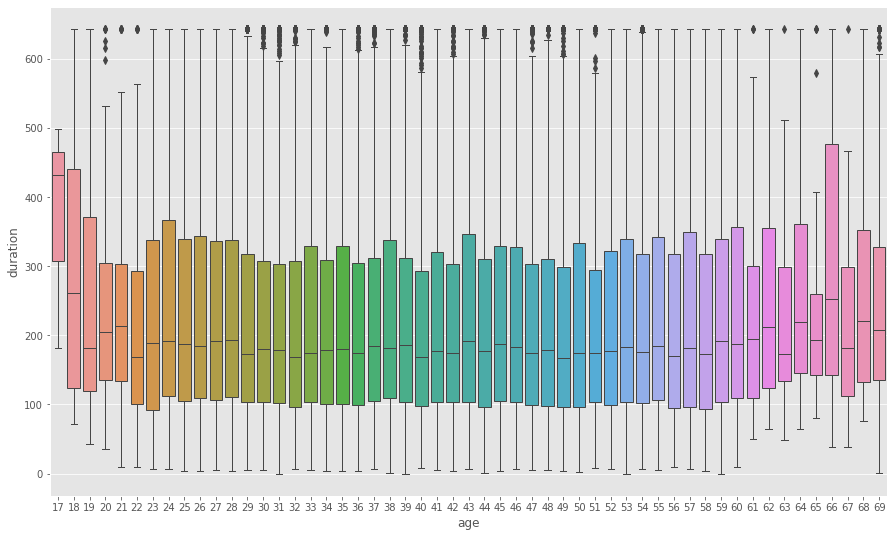

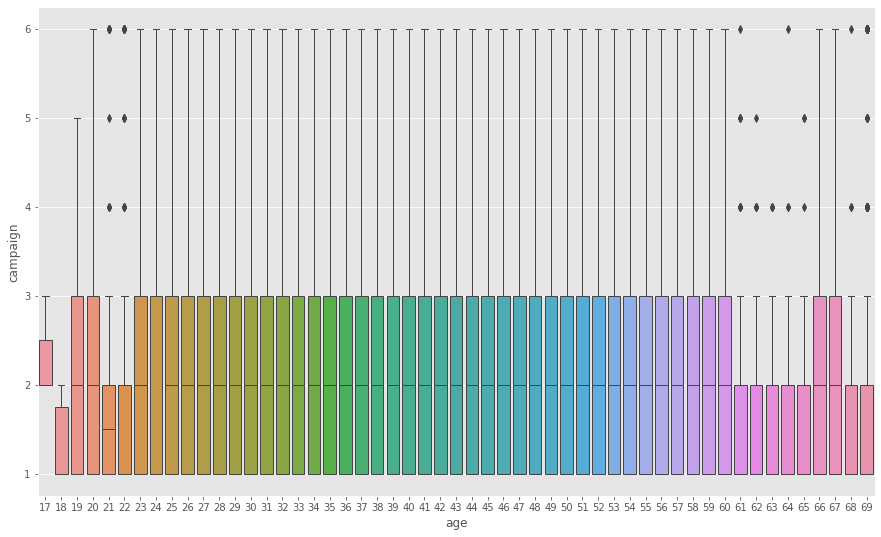

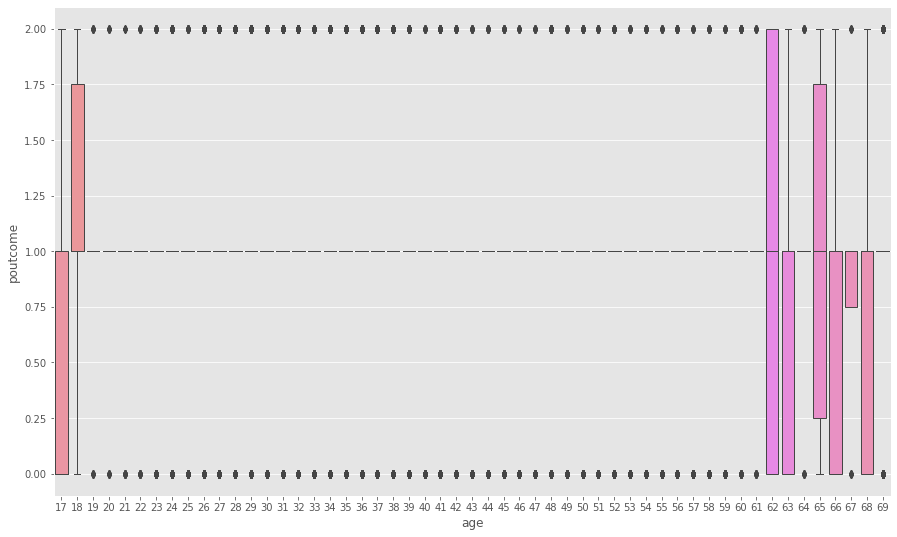

In [74]:
for i in ['job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'poutcome'
       ]:
    plt.figure(figsize=(15,9))
    sns.boxplot(x=data.age,y=data[i],data=data,linewidth=1)
    plt.show()

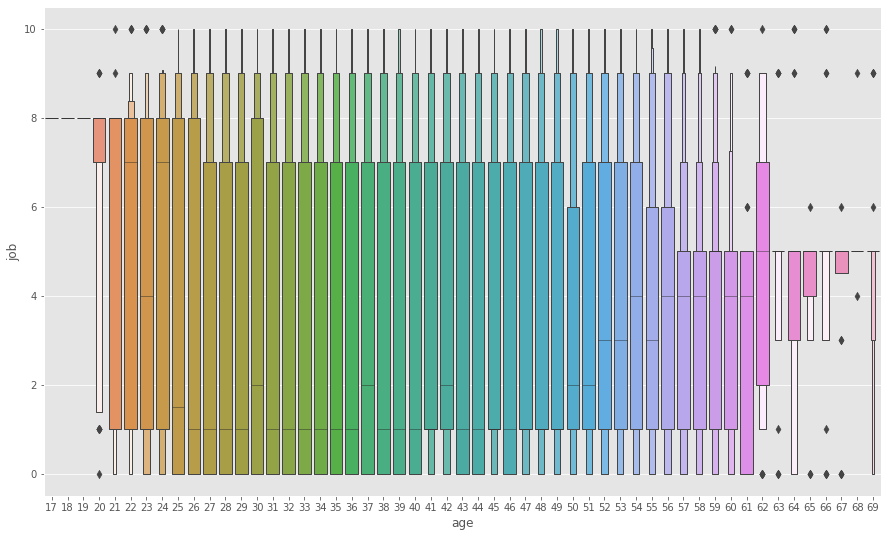

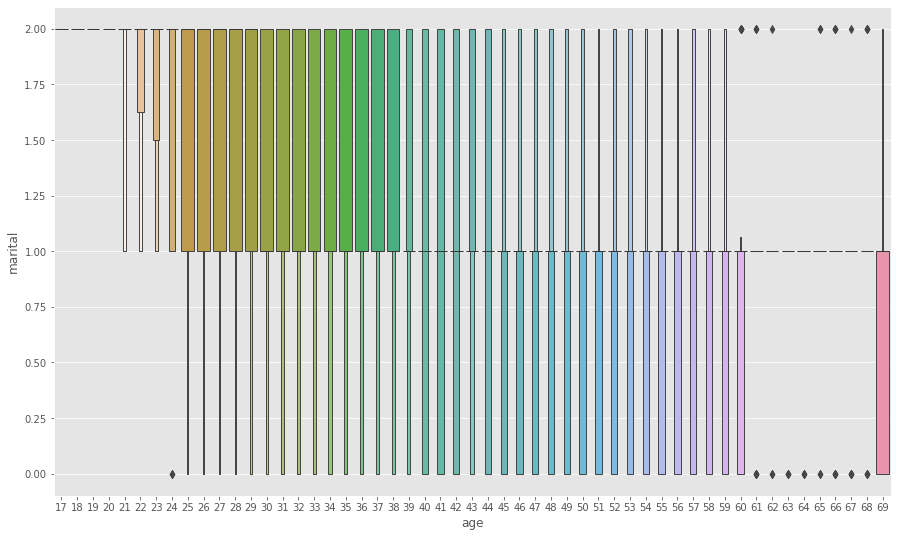

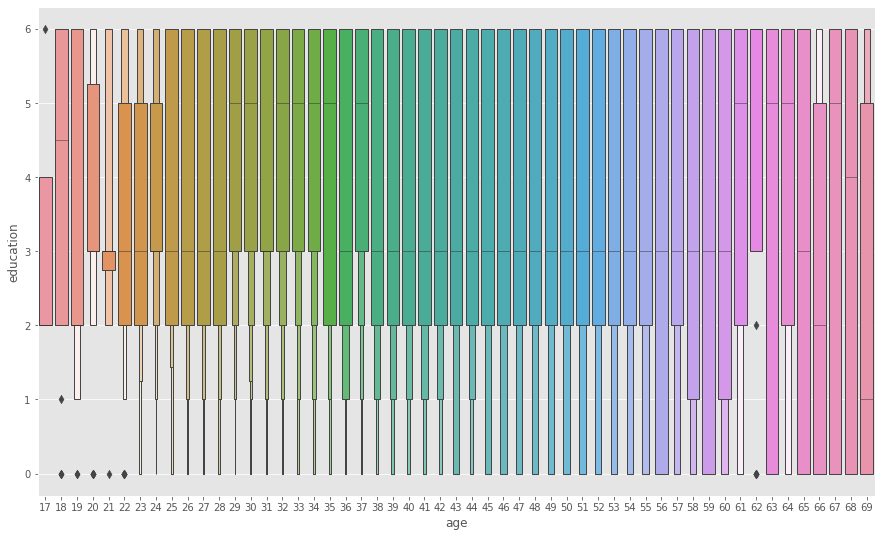

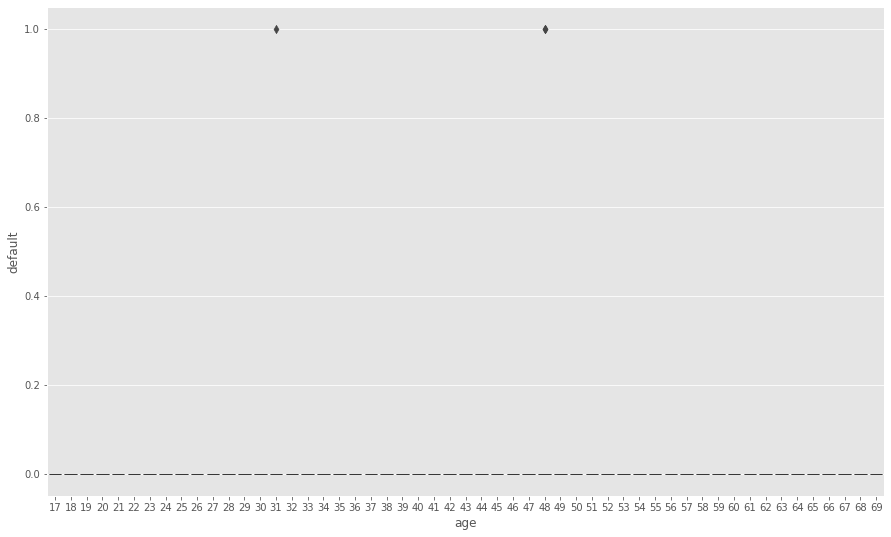

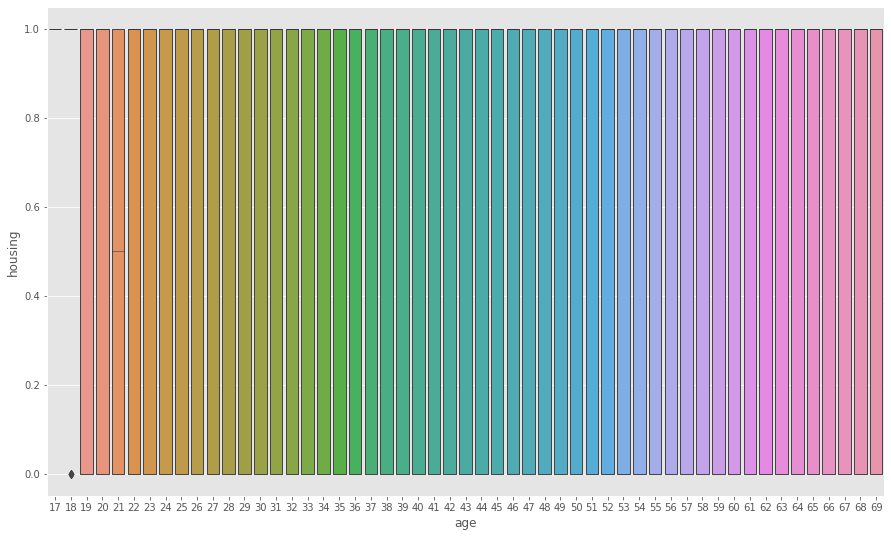

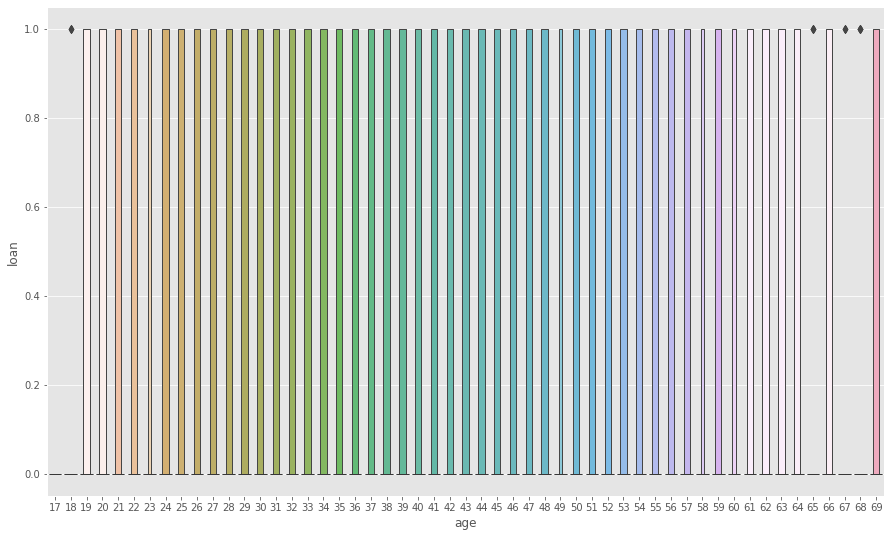

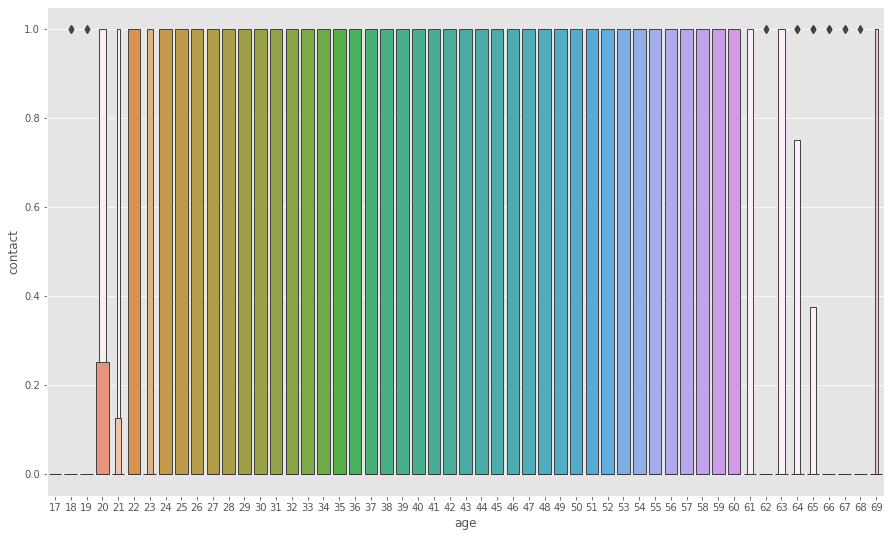

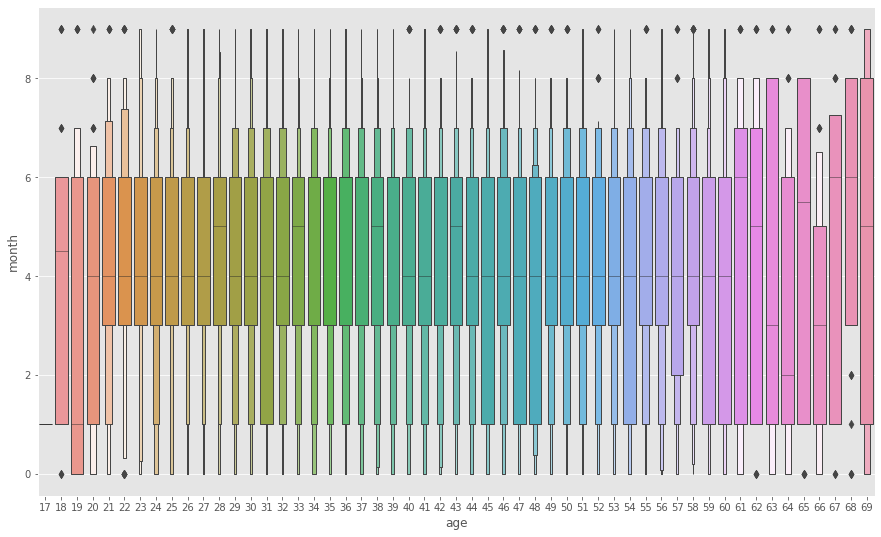

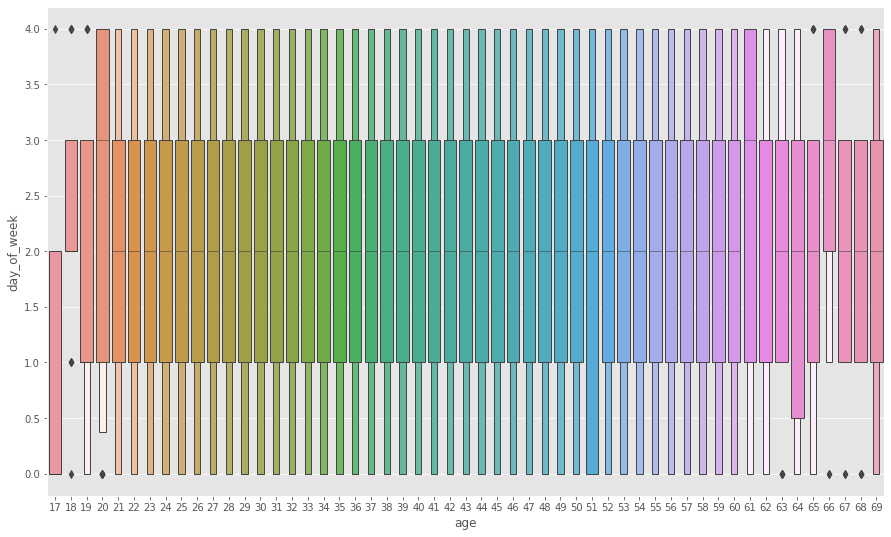

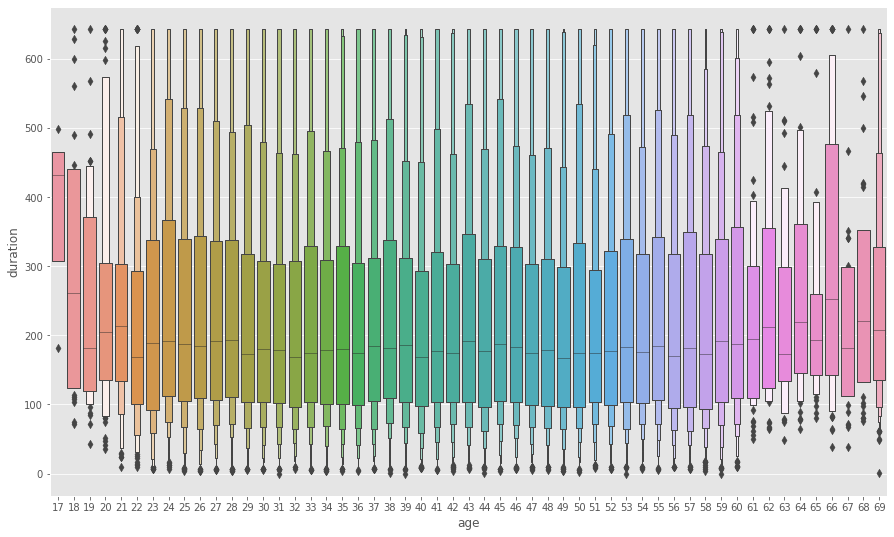

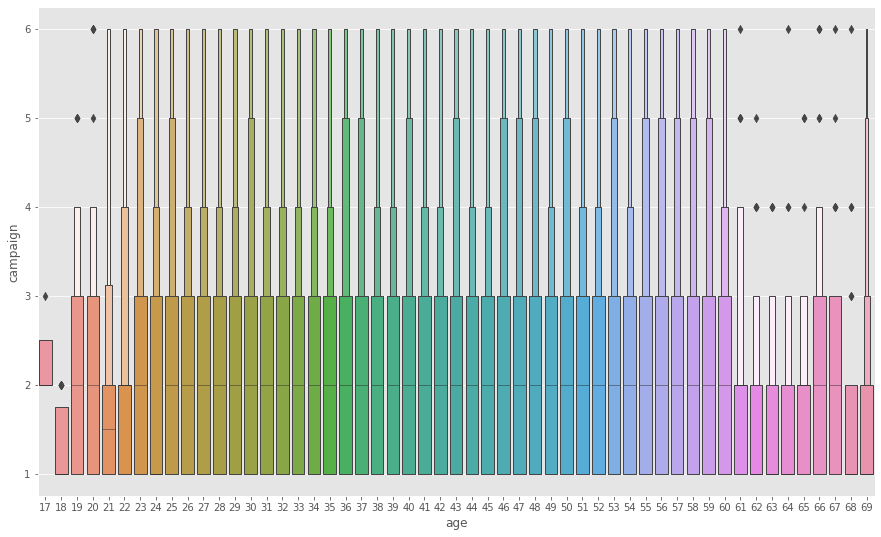

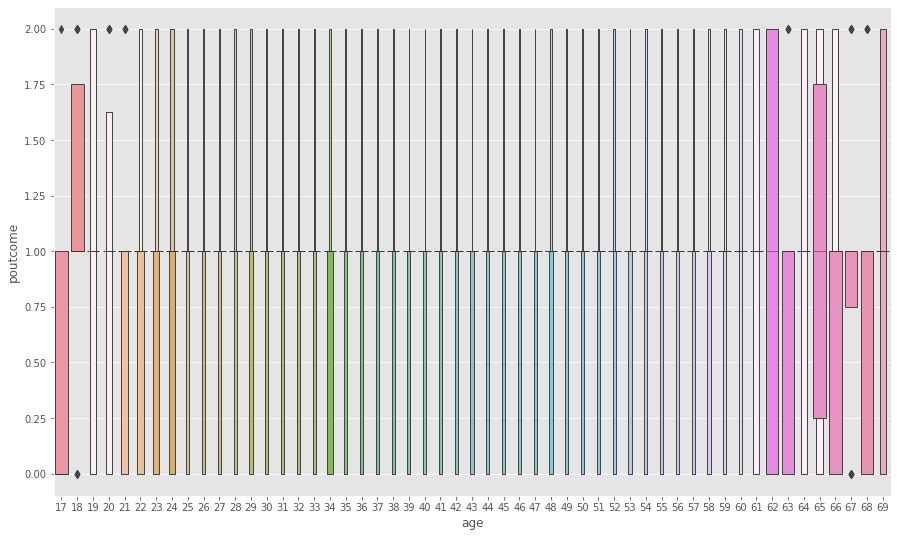

In [75]:
for i in ['job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'poutcome'
       ]:
    plt.figure(figsize=(15,9))
    sns.boxenplot(x=data.age,y=data[i],data=data,linewidth=1)
    plt.show()


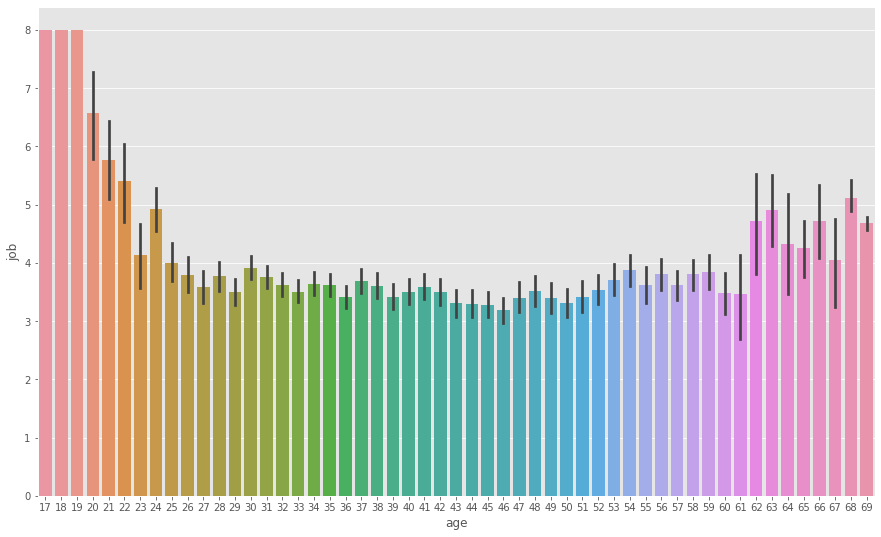

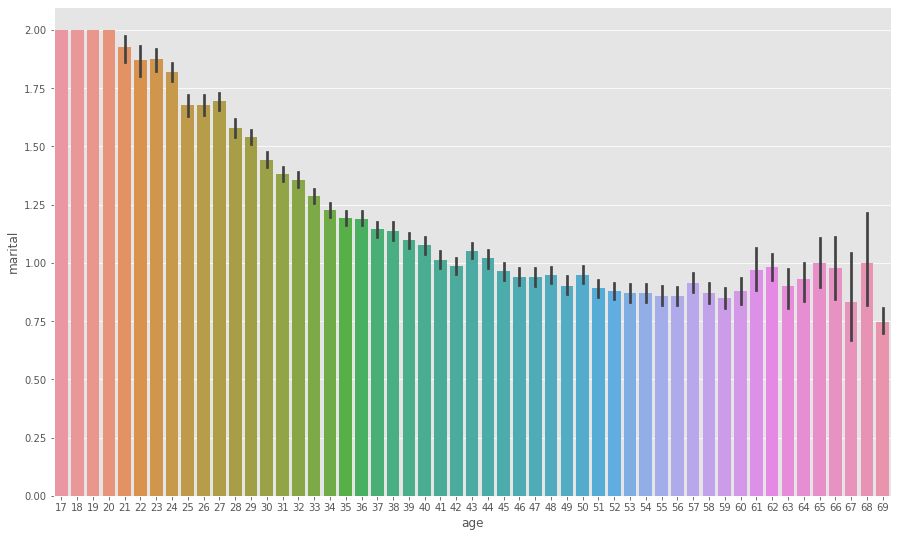

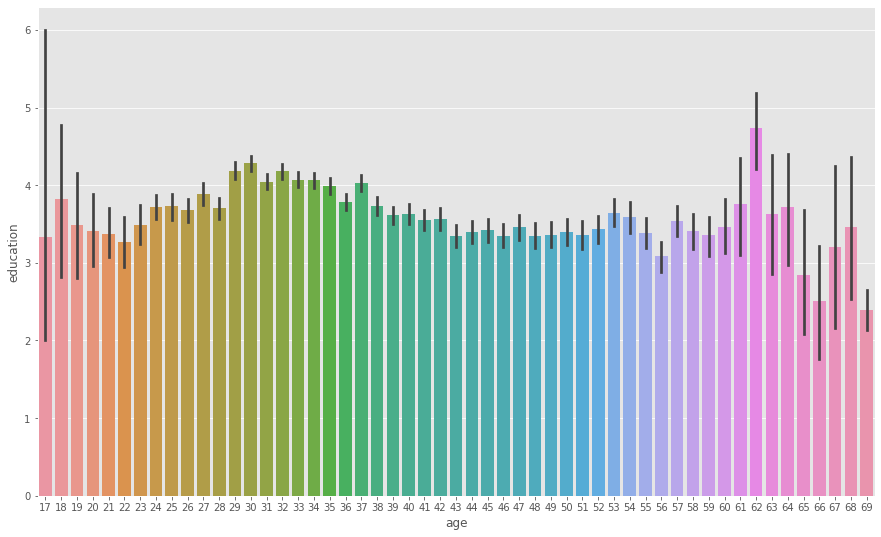

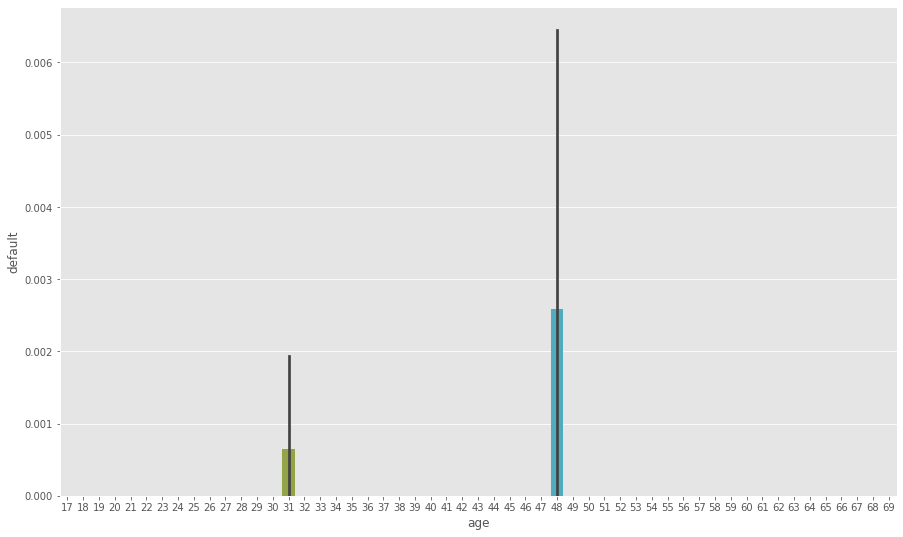

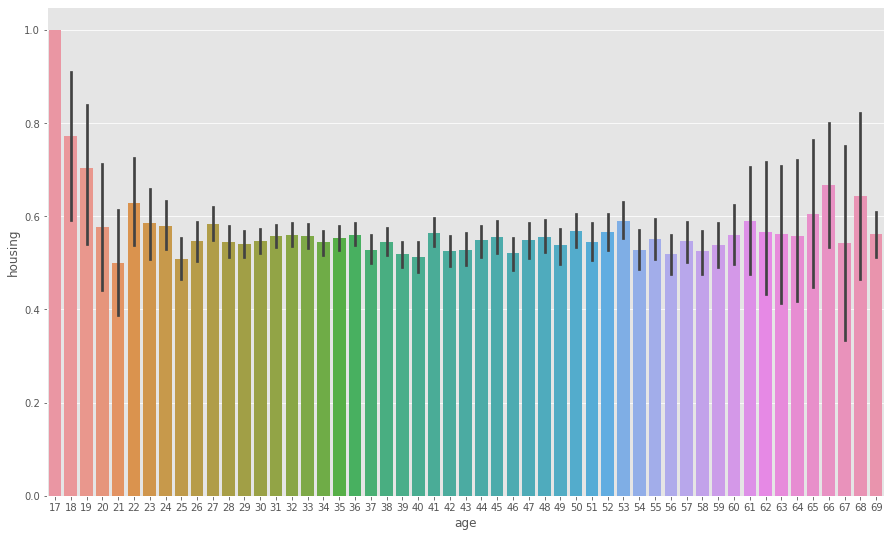

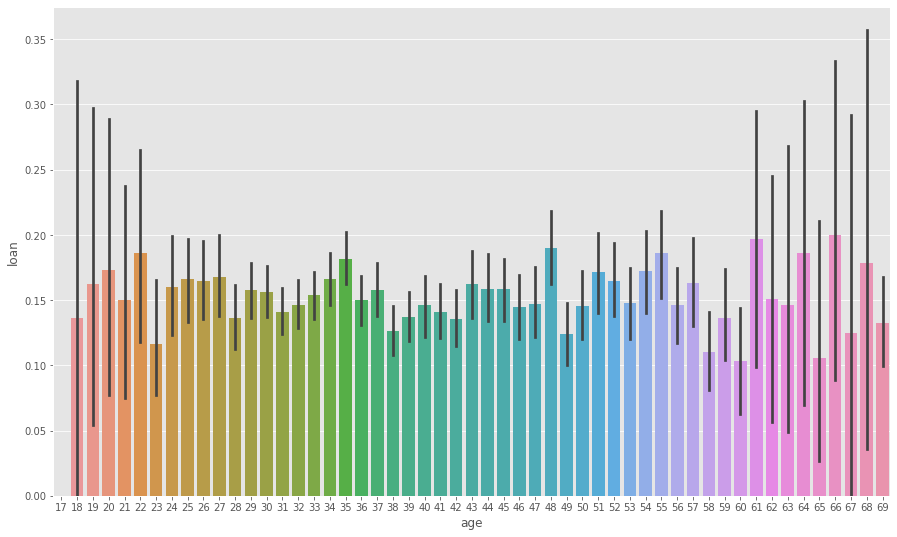

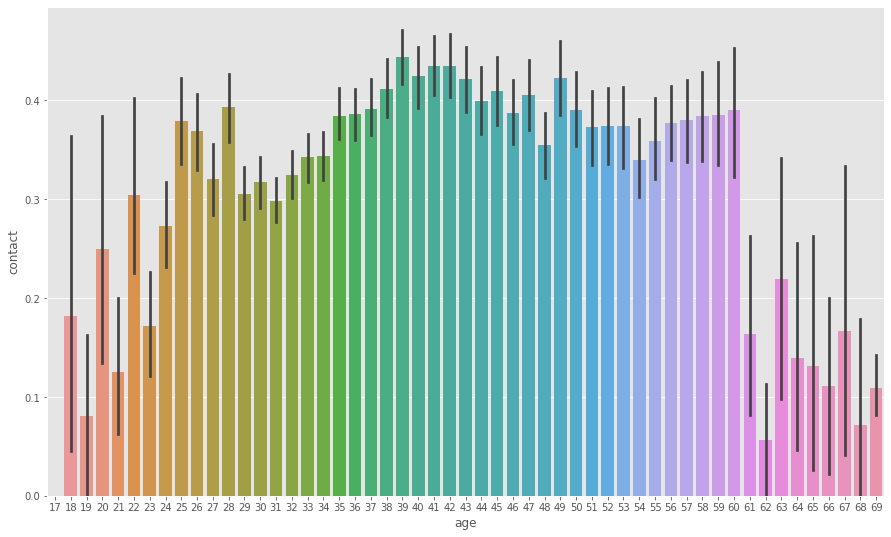

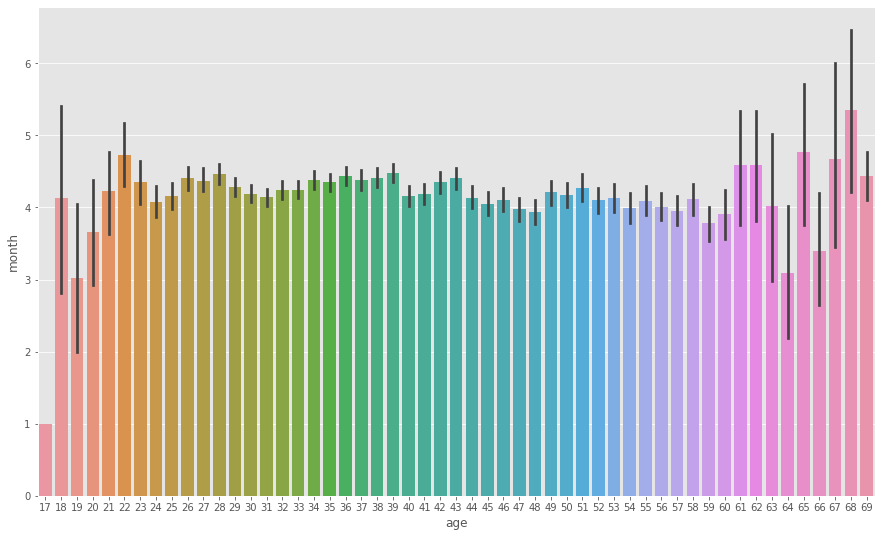

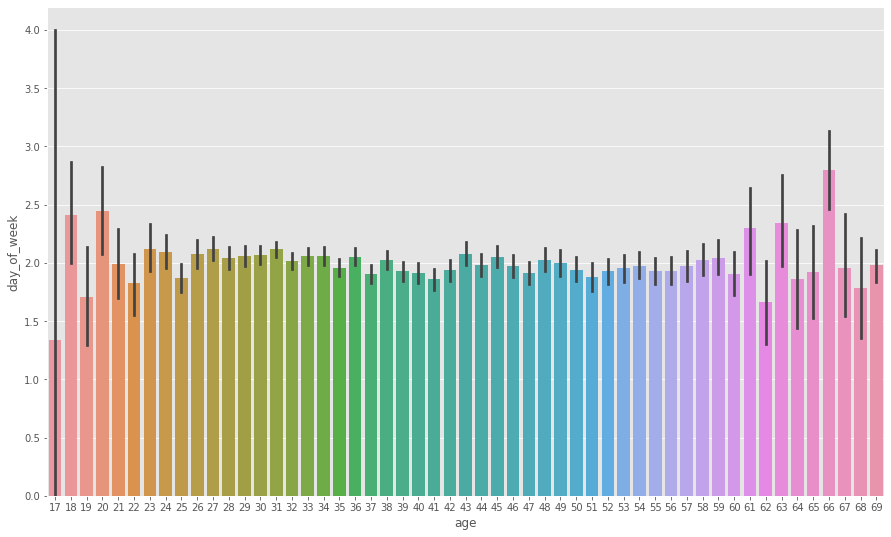

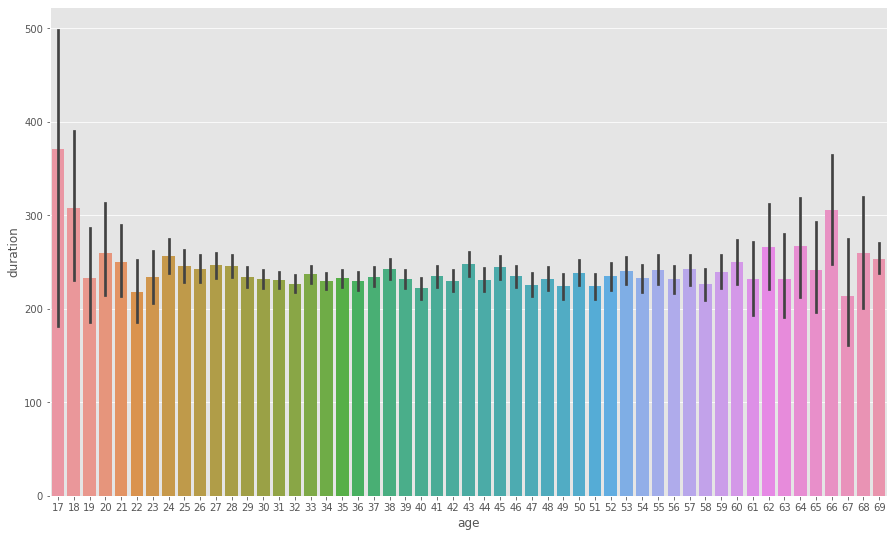

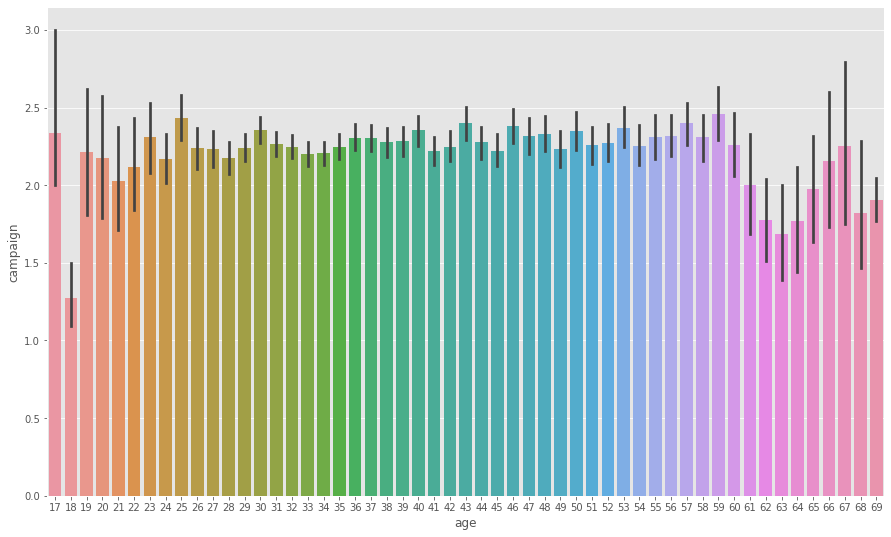

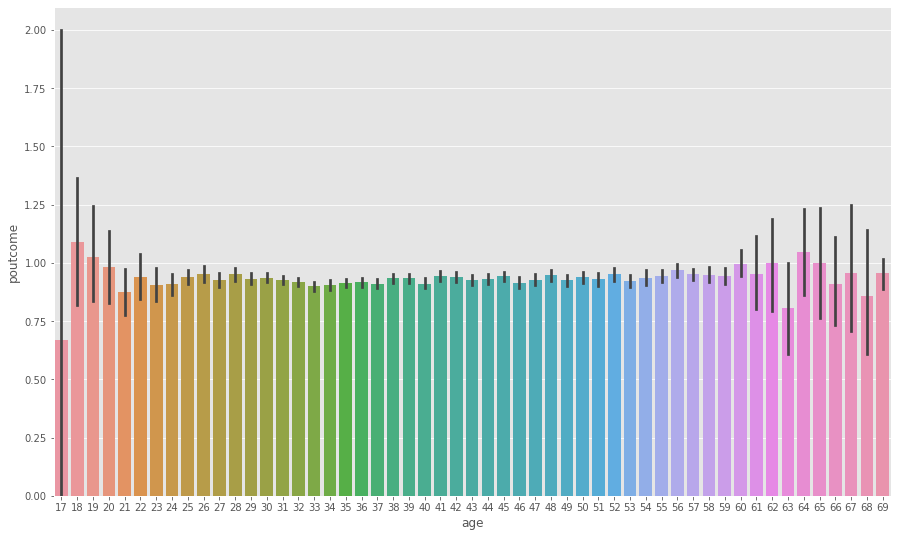

In [76]:
for i in ['job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'poutcome'
       ]:
    plt.figure(figsize=(15,9))
    sns.barplot(x=data.age,y=data[i],data=data,linewidth=1)
    plt.show()


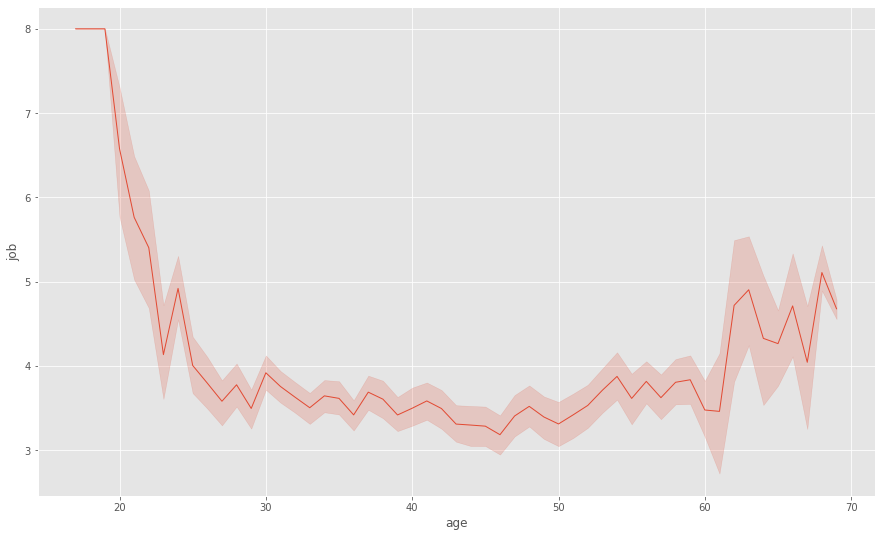

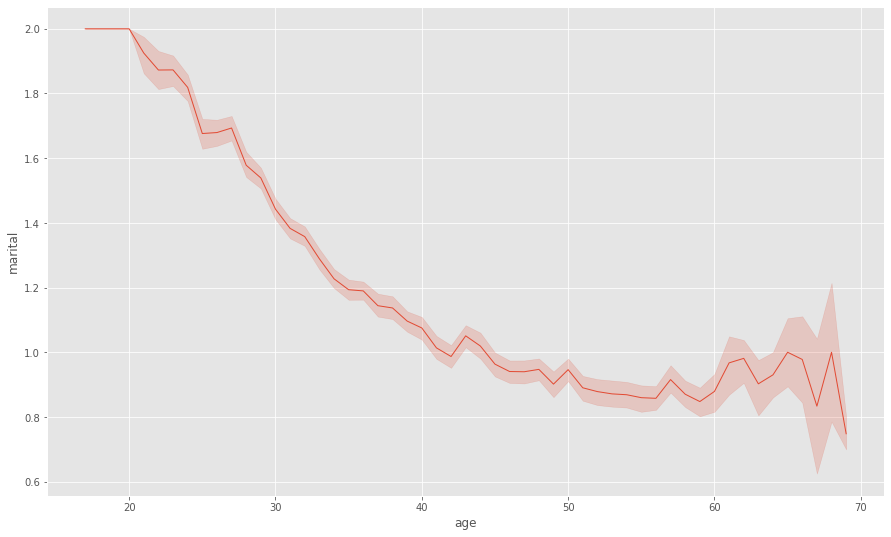

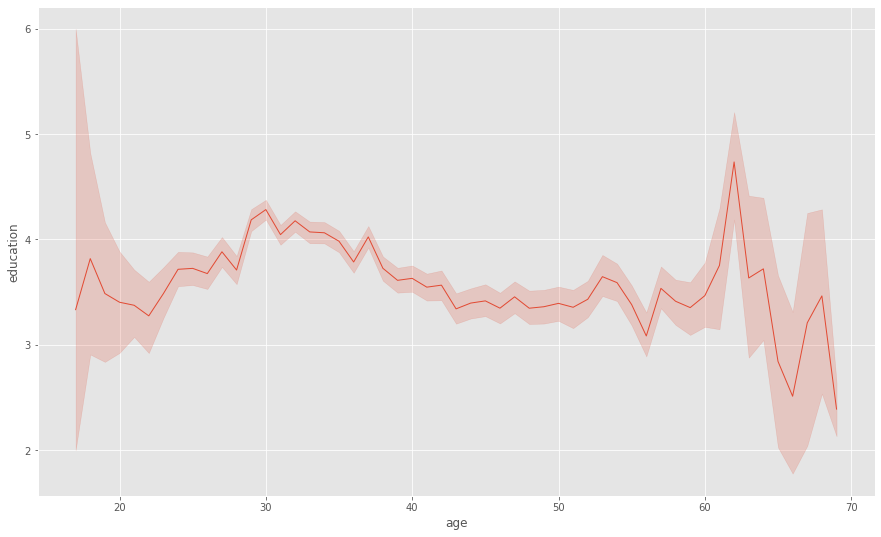

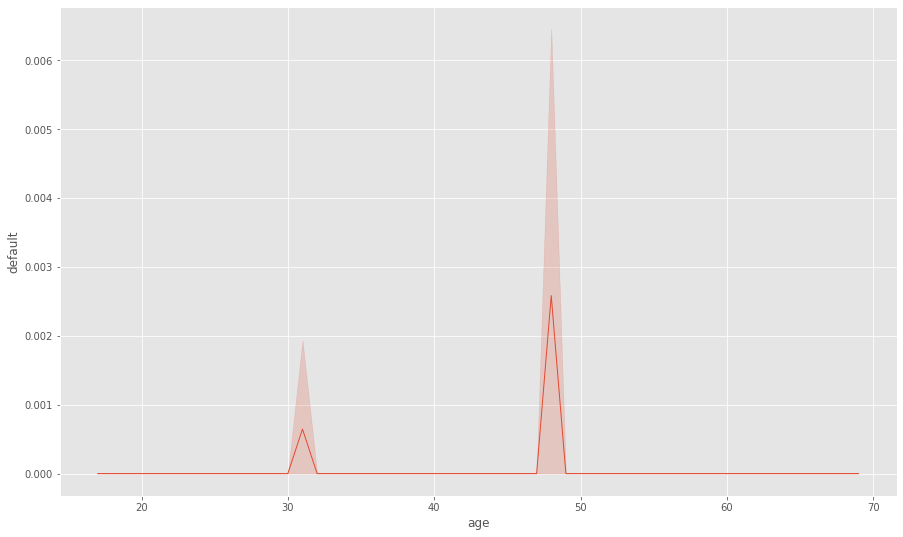

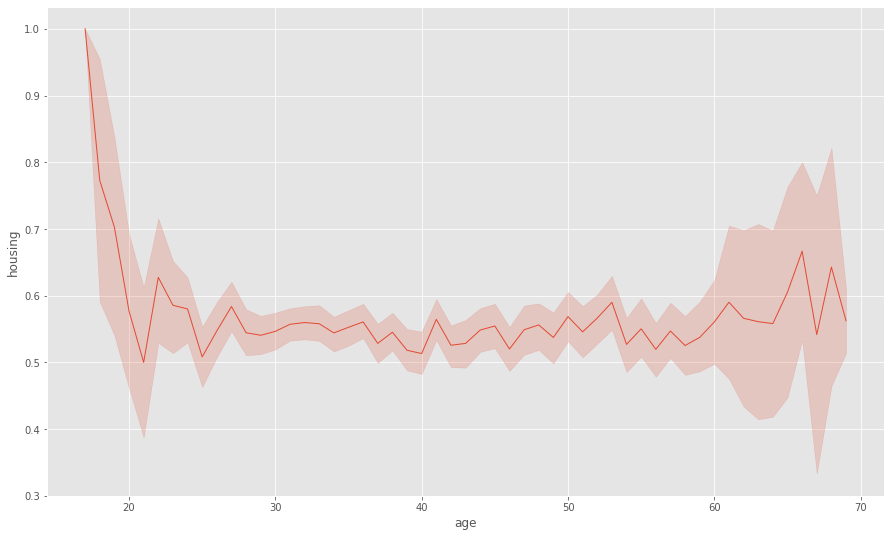

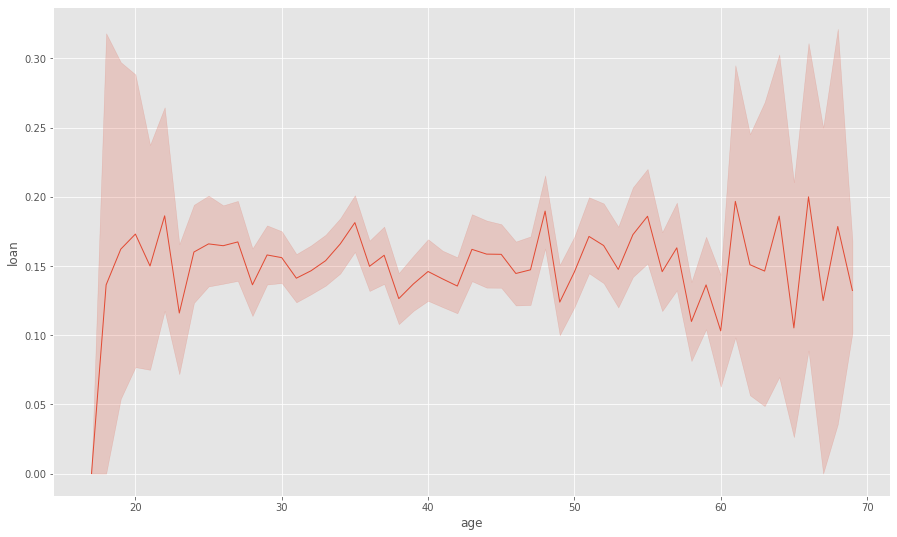

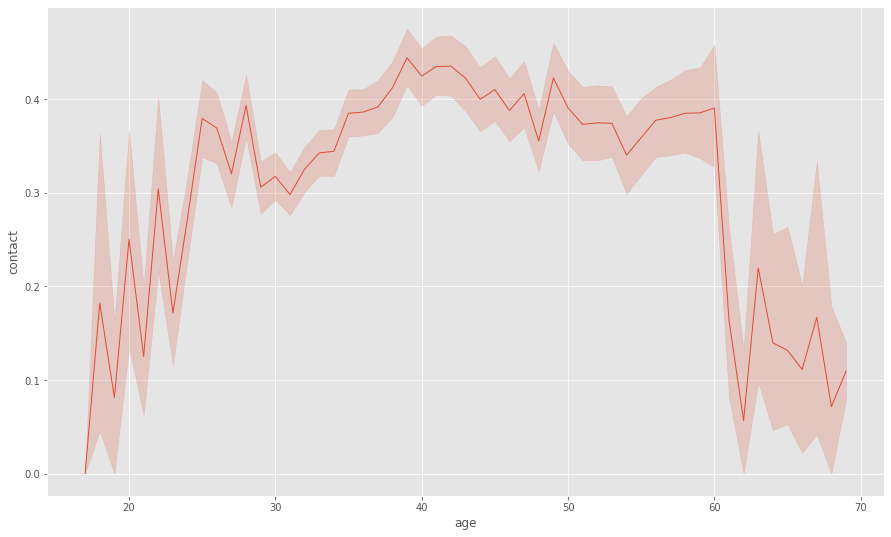

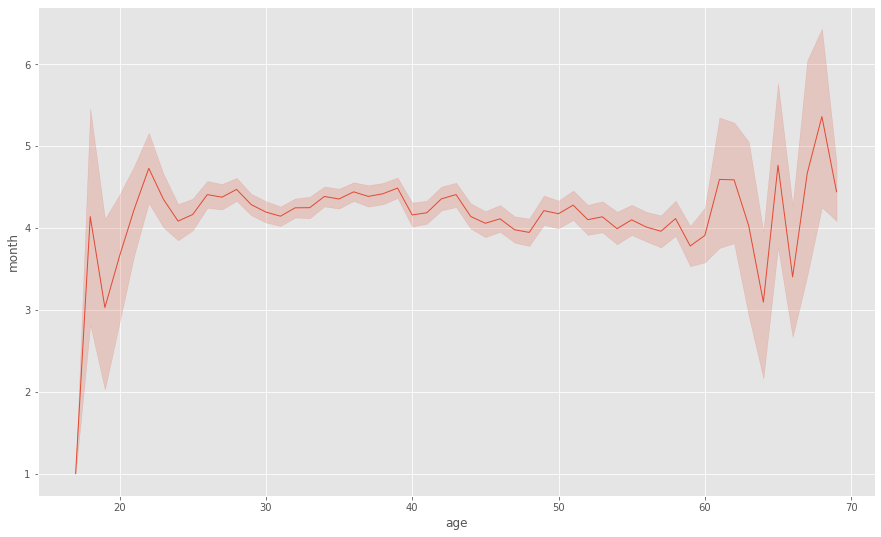

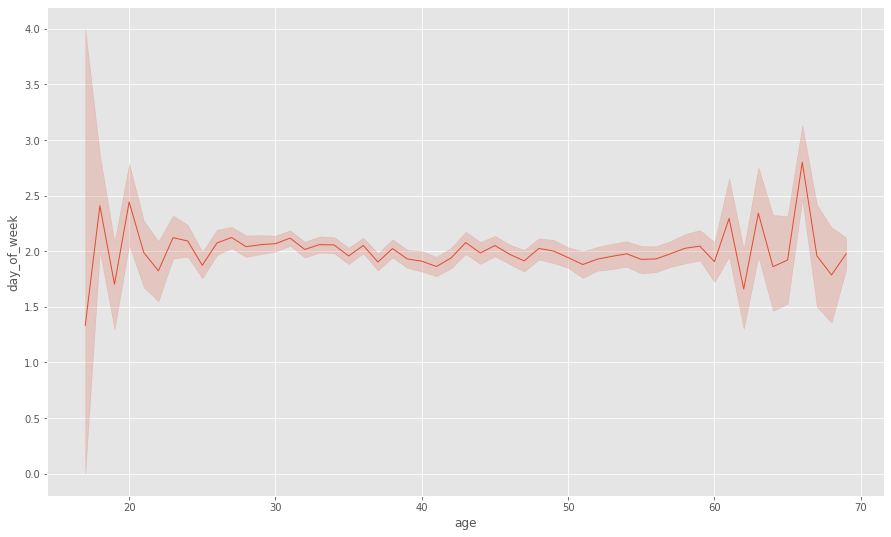

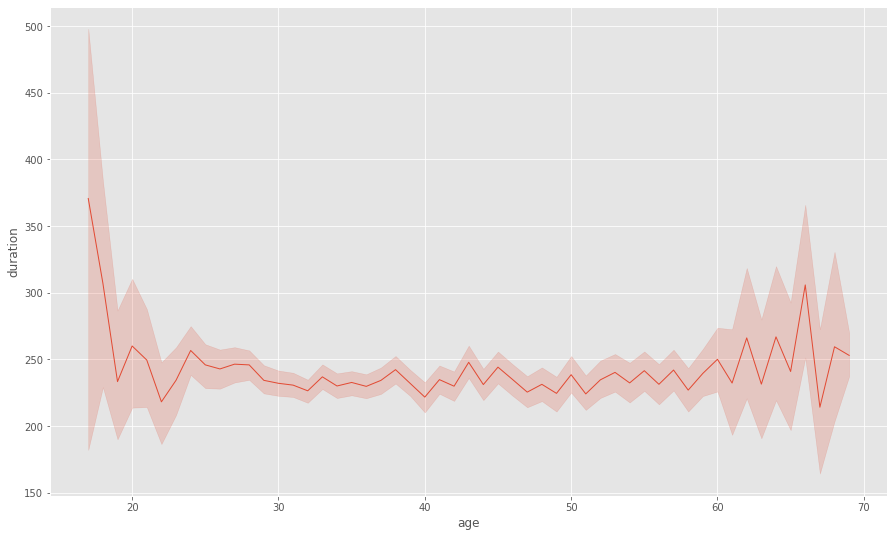

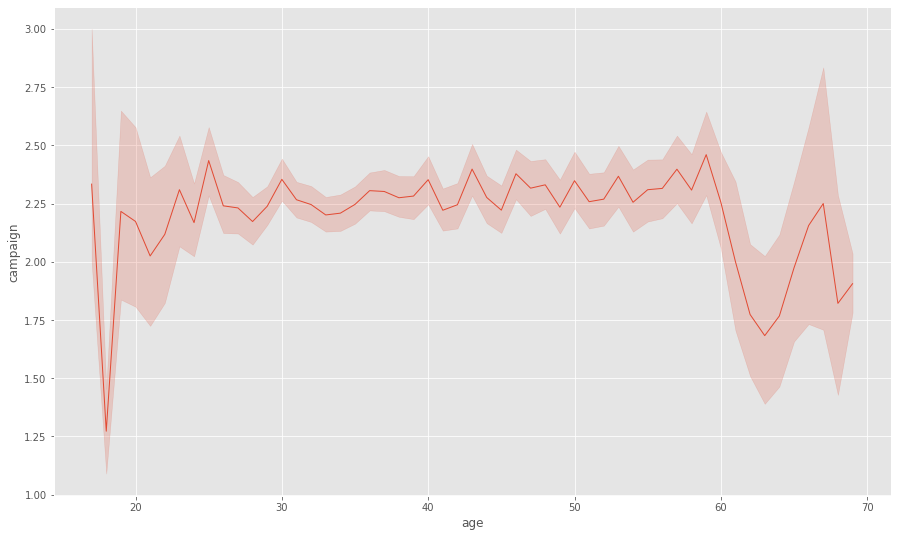

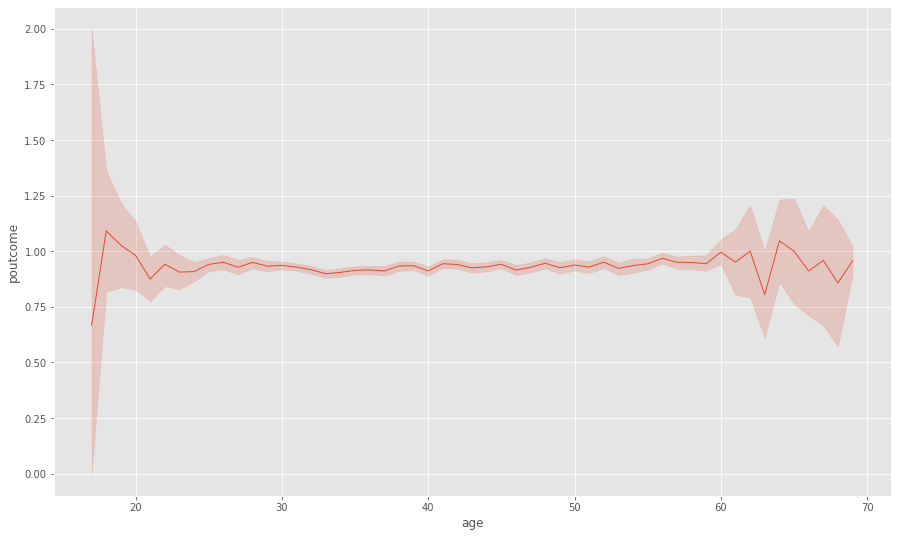

In [79]:
for i in ['job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'poutcome'
       ]:
    plt.figure(figsize=(15,9))
    sns.lineplot(x=data.age,y=data[i],data=data,linewidth=1)
    plt.show()

<Figure size 1080x648 with 0 Axes>

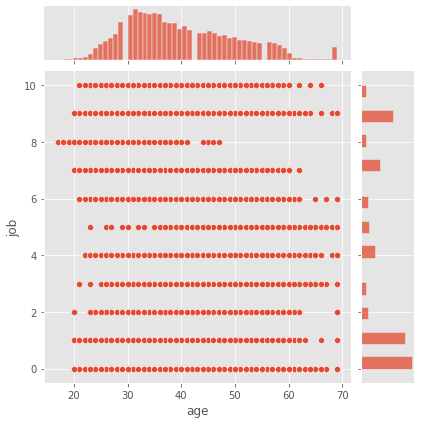

<Figure size 1080x648 with 0 Axes>

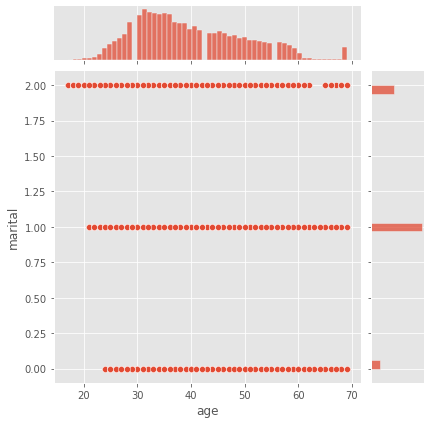

<Figure size 1080x648 with 0 Axes>

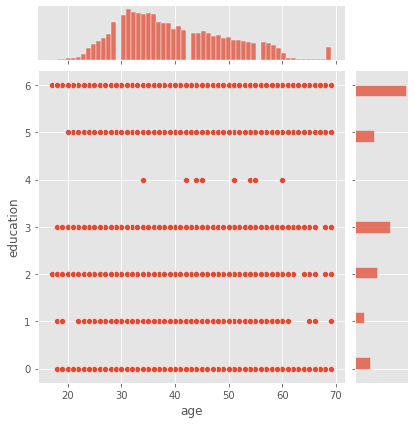

<Figure size 1080x648 with 0 Axes>

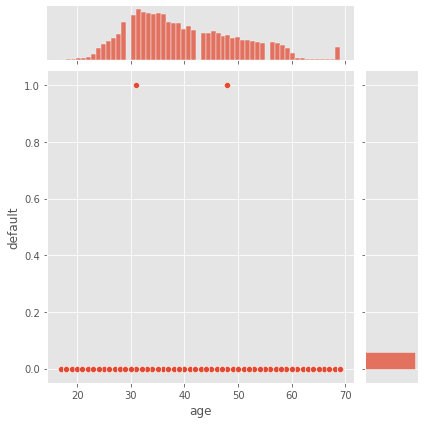

<Figure size 1080x648 with 0 Axes>

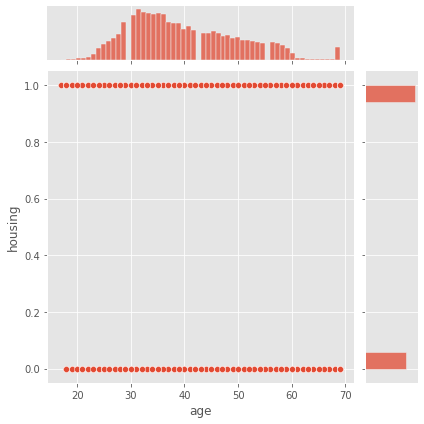

<Figure size 1080x648 with 0 Axes>

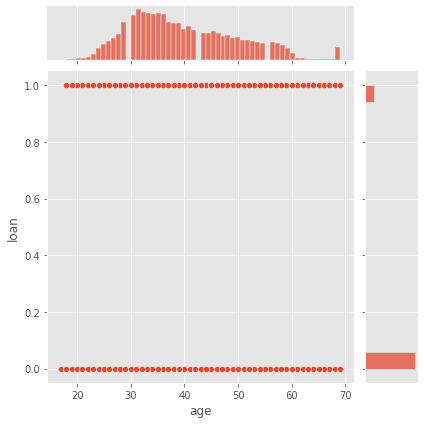

<Figure size 1080x648 with 0 Axes>

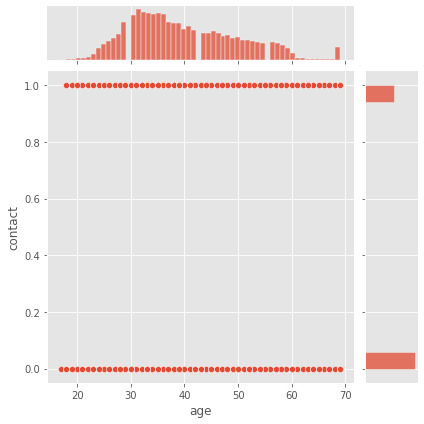

<Figure size 1080x648 with 0 Axes>

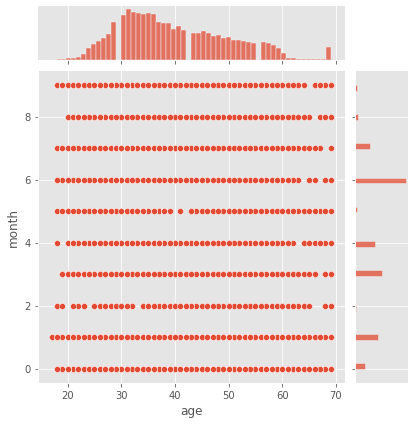

<Figure size 1080x648 with 0 Axes>

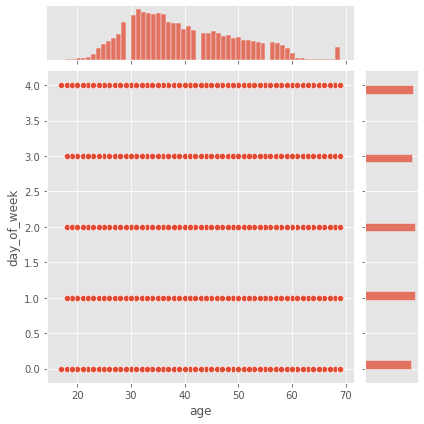

<Figure size 1080x648 with 0 Axes>

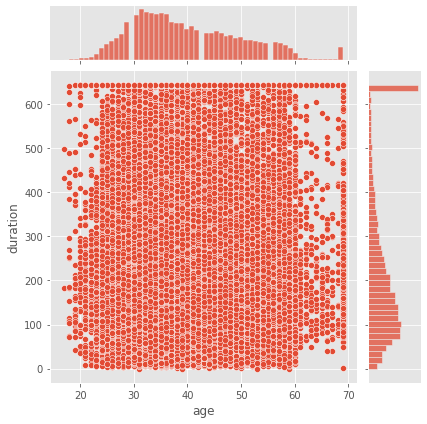

<Figure size 1080x648 with 0 Axes>

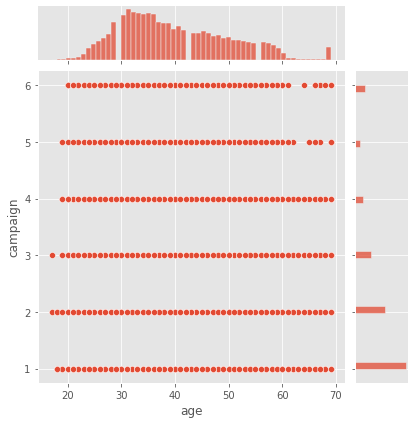

<Figure size 1080x648 with 0 Axes>

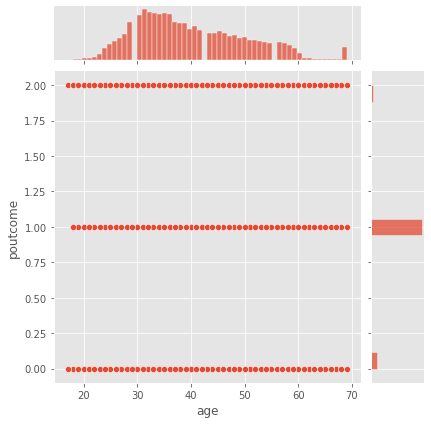

In [82]:
for i in ['job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'poutcome'
       ]:
    plt.figure(figsize=(15,9))
    sns.jointplot(x=data.age,y=data[i],data=data)
    plt.show()


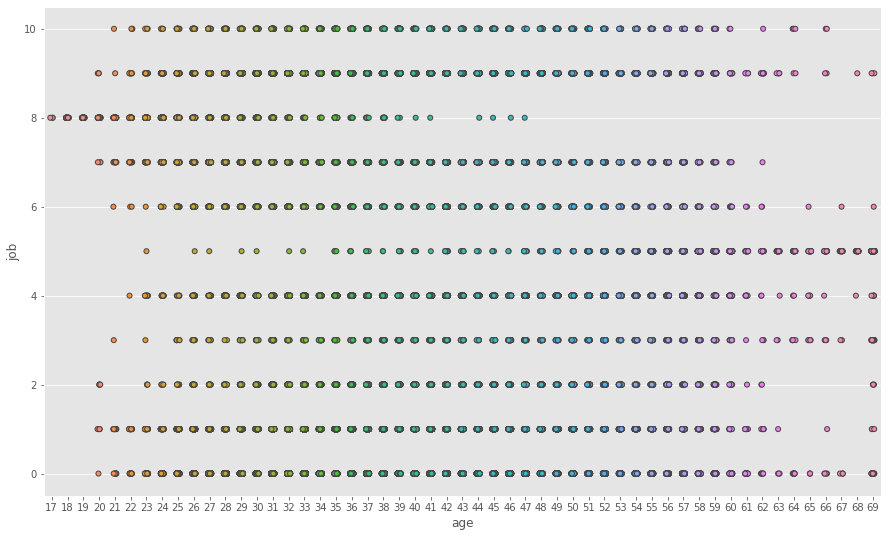

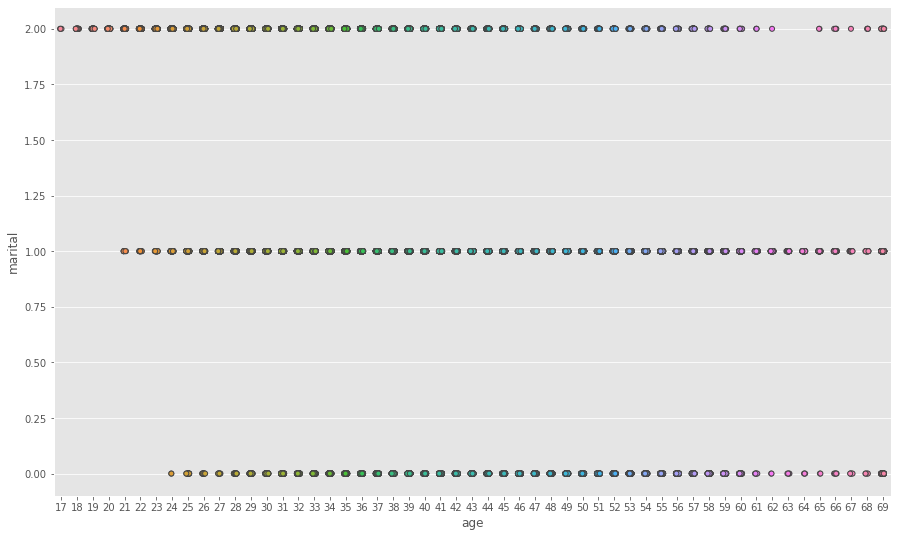

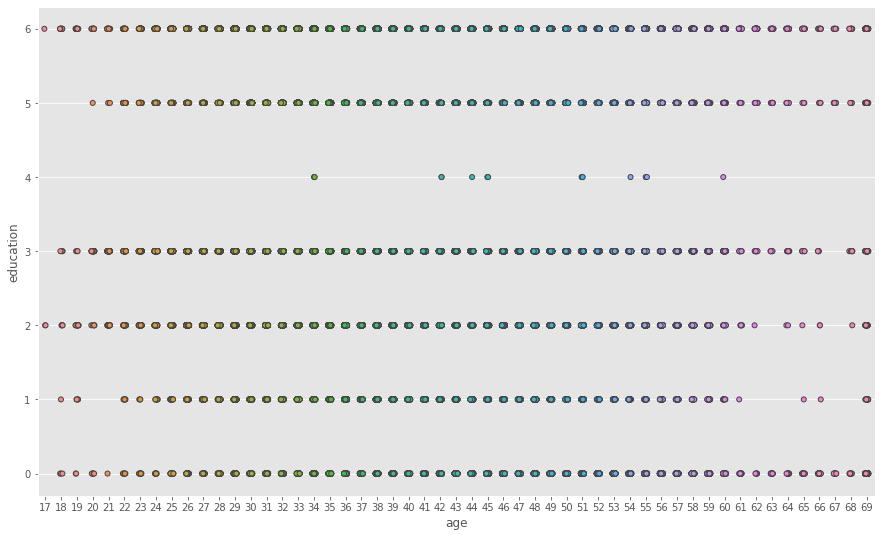

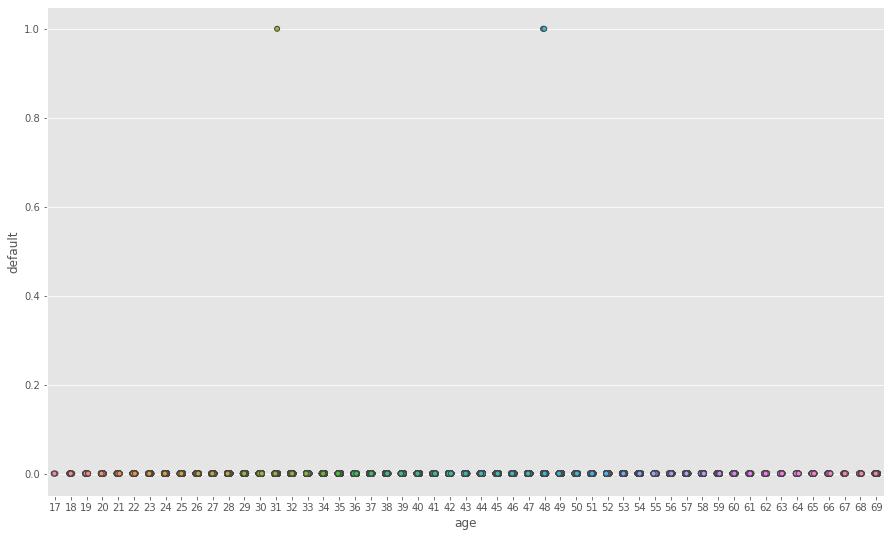

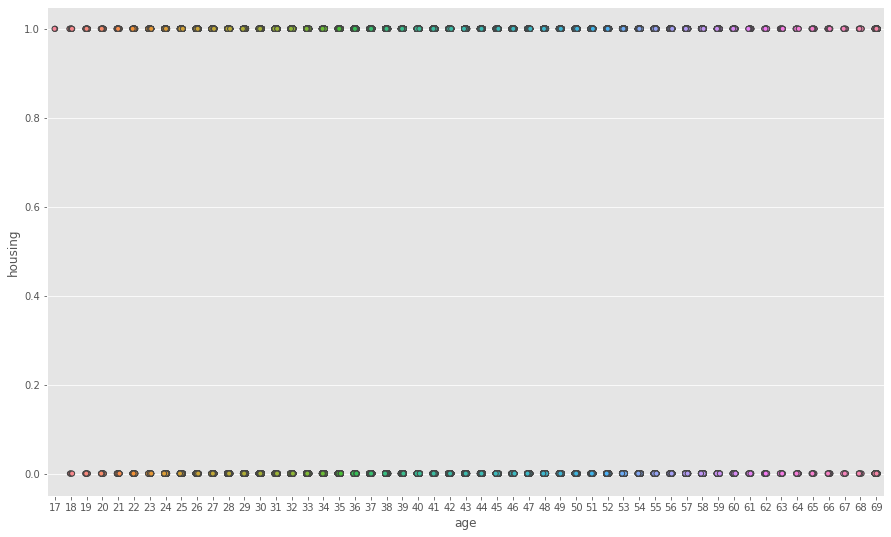

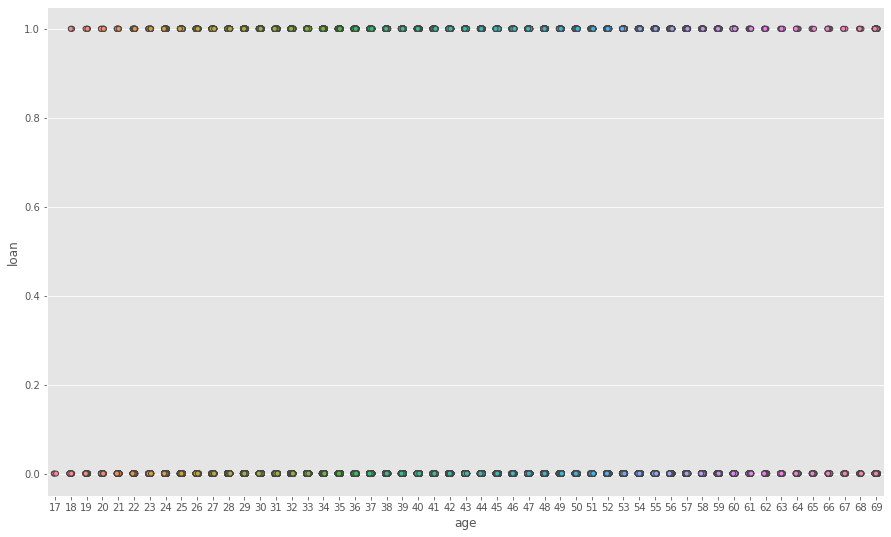

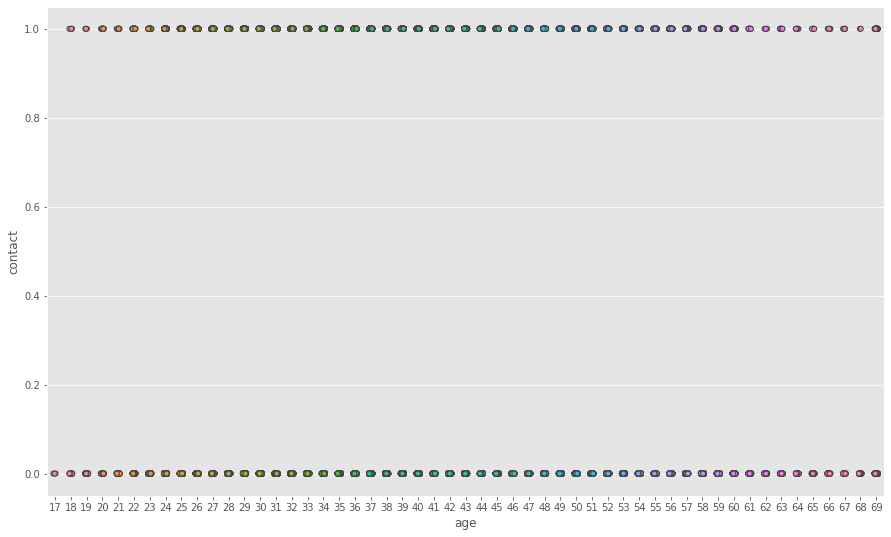

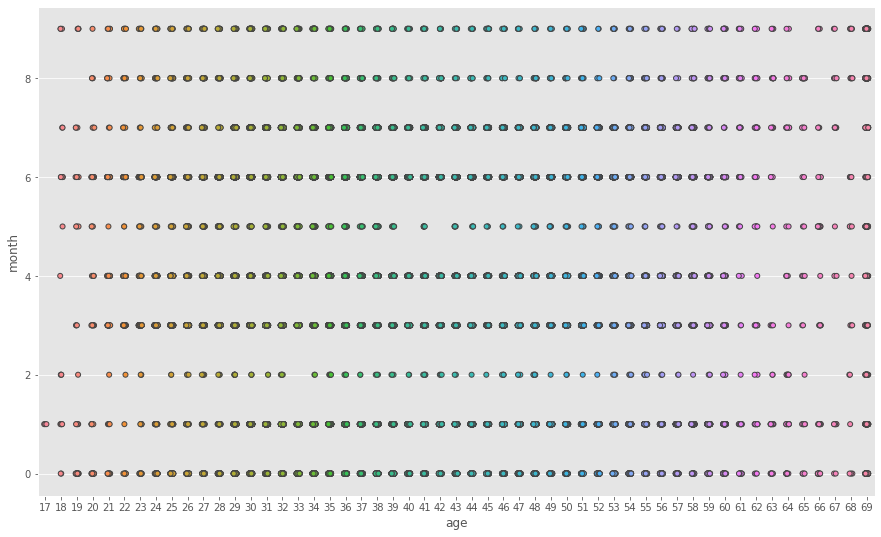

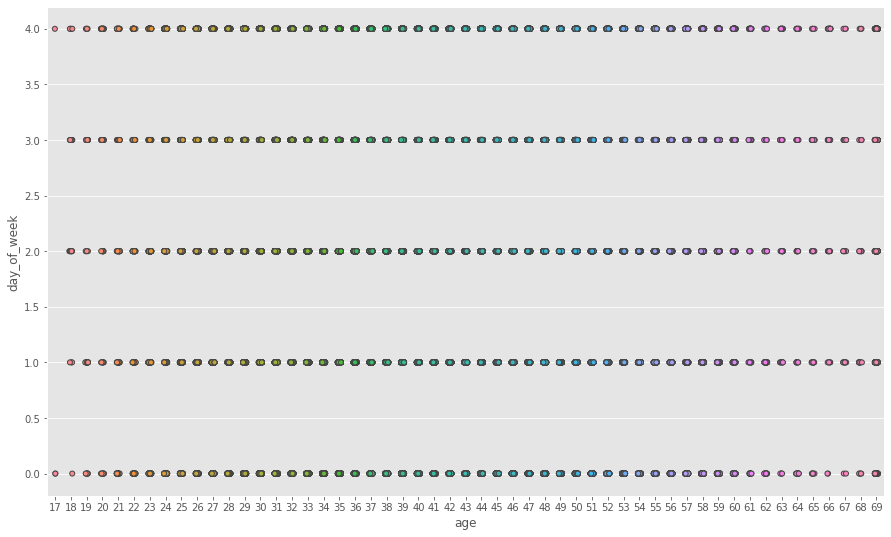

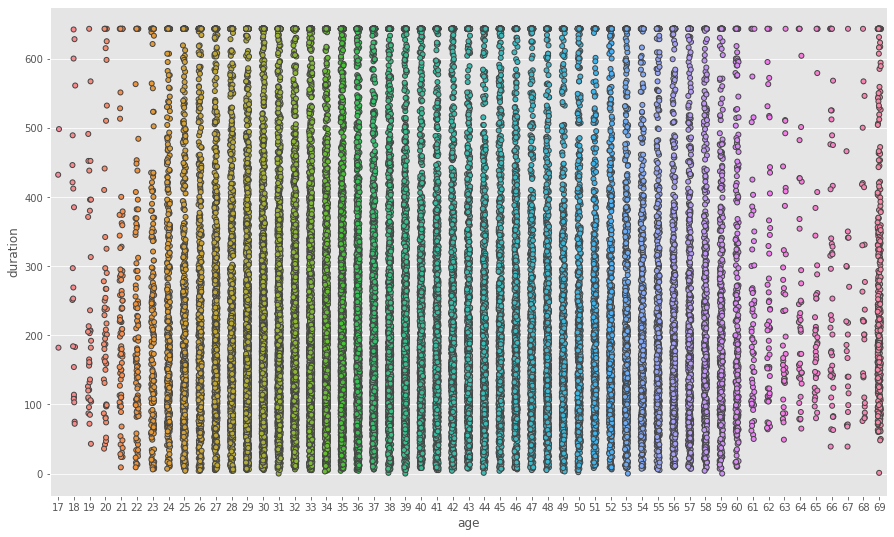

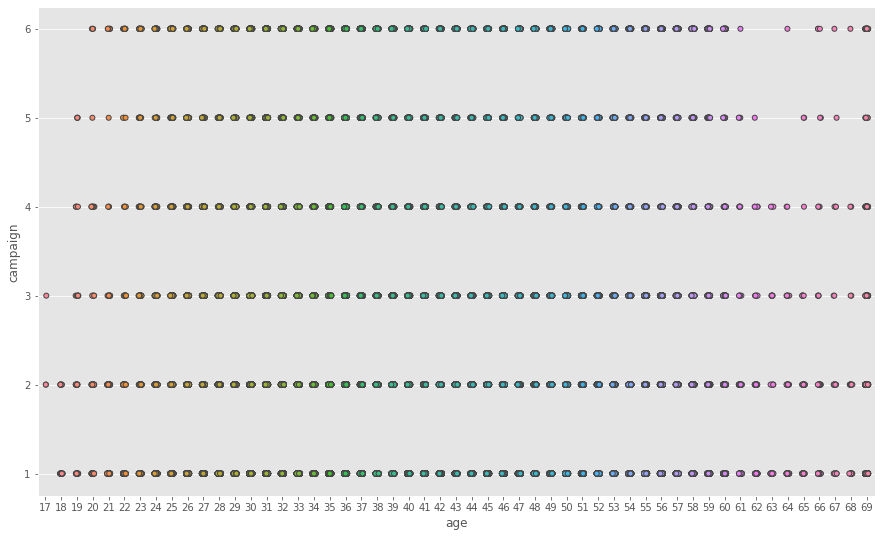

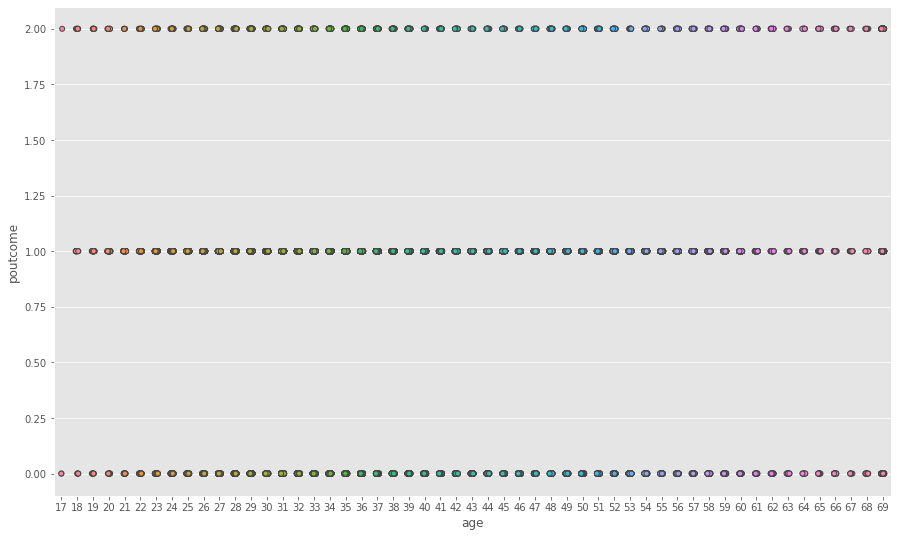

In [84]:
for i in ['job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'poutcome'
       ]:
    plt.figure(figsize=(15,9))
    sns.stripplot(x=data.age,y=data[i],data=data,linewidth=1)
    plt.show()

<Figure size 14400x14400 with 0 Axes>

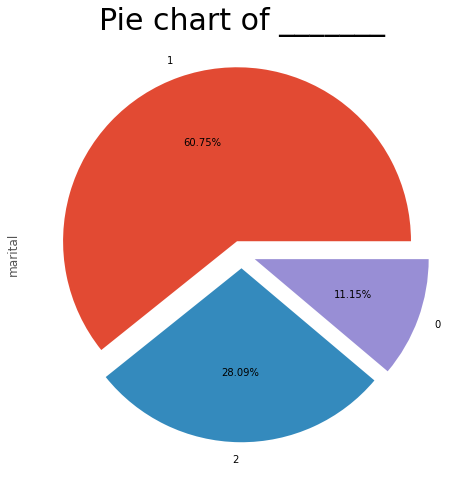

In [89]:
explode=(0.08,0.08,0.08)
fig = plt.figure(figsize=(200, 200))
plt.figure(figsize=(10,7))
data['marital'].value_counts().plot.pie(autopct='%1.2f%%',figsize=(8,8),explode=explode)
plt.title("Pie chart of _______", fontsize=30)
plt.show()

In [90]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'poutcome',
       'y'],
      dtype='object')

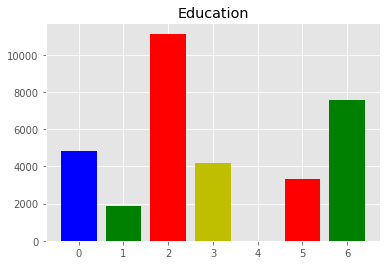

In [92]:
plt.bar(data['education'].unique(), data["education"].value_counts(), color = ['r', 'g','b','y'])
plt.title("Education")
plt.grid(True)

In [99]:
import sweetviz as sv

In [101]:
data=sv.analyze(data)
data.show_html("Analyze.html")

                                             |                                             | [  0%]   00:00 ->…

Report Analyze.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [102]:
from IPython.display import IFrame

In [103]:
IFrame(src='Analyze.html',width=1000,height=600)